<div class="alert alert-info">
<h1>
<font color=red>LAB 3 CLUSTERING-- NORTH CAROLINA EDUCATION DATA SET</font>
</h1>
</div>

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

## Business Understanding

> North Carolina students continue to make gains on most measures of student learning, according to school accountability data released (News Release School-Year 2016-2017) to the State Board of Education, with more than 75 percent of public schools overall earning grades of C or better in the third year of the state’s A-F grading system.

> School grades, required by state law, continue to correlate closely with the poverty levels of schools. Among all schools last year that received a D or F, 93 percent had enrollments with at least 50 percent of students from low-income families. Conversely, among schools that received at least a B, 75.7 percent had enrollments with less than 50 percent of students from low-income families.

> In terms of growth achieved by schools this past year, 27.5 percent exceeded expected growth, virtually unchanged from 2014-15; 46.1 percent of schools met their expected performance, up from 44.7 percent in the previous year; and 26.4 percent fell short of their expected result, down from 27.7 percent the year before. The percentages of schools falling into the three growth categories have remained constant since 2012-13, with slight annual fluctuations up and down.

> Full News Release Article http://www.ncpublicschools.org/newsroom/news/2016-17/20160901-01

### Clustering
> In an attempt to gain insights into which schools can be expected to attain a four-year graduation rate above or below the state average, we will incorporate clustering algorithms in the following report. Our goal is to determine if it is possible to correctly label high schools in North Carolina as either achieving above average graduation rates or below average graduation rates using information provided by the state. To test the validity of our results, we will compare the clustering results of our algorithm with the actual graduation rate data of each school. If we can predict the correct designation with a high degree of accuracy then we have achieved the goal of this analysis. 

> A model that can correctly predict if a high school will achieve a certain graduation rate threshold based on the data provided by the state would provide two benefits. Firstly, schools that are predicted to fall below the threshold may have time to take proactive steps in correcting that potential outcome. While corrective actions are not within the purview of this report, it is important to consider possible ways in which the results of our algorithm can be used in a proactive way. Increased focus on preparation for remaining tests, after school tutoring programs, and initiatives to encourage students are just a few options for what schools can do to try and improve graduation rates before the end of the school year. The second benefit that an accurate model would provide is that it would be a strong foundation from which to investigate this data further. We will be looking at all of the variables to build our clustering models in this report, but deeper understanding can potentially be gained by compartmentalizing the variables as well. For instance, if there are certain schools that consistently fall below the graduation rate threshold then further analysis into the possible reasons for this can be done.

> These are just two of the potential uses for a successful clustering model, but there could be many more. Before educator’s can determine its best uses, however, the model that can correctly cluster schools by their four-year graduation rate must be built. It is with this goal in mind that we present our analysis below.

> The effectiveness of these clustering algorithms have been measured by using external validation technique, that is, by comparing the clustering results with the variable Above_NC_AVG_Graduation_Rate4_Yr - which indicates whether a given schools' four-year high school graduation rate is above or below the North Carolina state average. Segmenting schools that have similar performance can help State officials and other stakeholders to investigate the characteristics of these groups of schools and explore their policies.


## Data Understanding - Define and prepare class variables


>#### Data Source

>For this project we'll be using the North Carolina Schools education data set. The data we use is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public-school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

>Our starting datasets [All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews GitHub https://github.com/jakemdrew/EducationDataNC where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans them for Machine learning.

>We performed Visualization of high school’s data subset from this data, in our visualization lab hosted at https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

>To gauge the health of the education system in the state of North Carolina, our team is going to focus on building models to classify the four-year graduation rate `Graduation_Rate4_Yr` on High school data. 
 
>Our team will build classification models to classify schools based on graduation rate of High Schools. We will begin by creating a categorical feature "Above_Avg_Graduation_Rate4_Yr" based `Graduation_Rate4_Yr`. "Above_Avg_Graduation_Rate4_Yr" is a binary feature binning schools as 1 if their Graduation_Rate4_Yr is above North Carolina (NC) four-year average High school graduation rate (85.4%) per http://www.dpi.state.nc.us/newsroom/news/2015-16/20150902-01 or 0 if the school’s Graduation_Rate4_Yr is below the NC State Average graduation rate. We will look at ROC curves, AUC, confusion matrix to see how well our classifiers fit our data perform.

>For both cases our team hopes to measure the accuracy and performance of our models by leveraging Stratified 10-Fold Cross Validation which will be discussed in detail in our results section of this report.

#### Loading the data

>In the code block below, we import python modules that we will use in our analysis and load [All_Data_By_School_Final] and [1516_Test_Scores] from Dr. Drews GitHub https://github.com/jakemdrew/EducationDataNC. All_Data_By_School_Final has 2579 rows, 293 features. Dr. Drew consolidated All_Data_By_School_Final from various tables within the NC Statistical Profiles and Report Card Databases. Each row represents a public school in the state of North Carolina and each feature is a school's attainment level. 1516_Test_Scores on the other end is school level attainment data containing 2669 rows, 73 features. The rows represent a school and the features are Percentage of entire student body meeting various subject, End of Grade (EOG), End of Course (EOC), ACT and Graduation Rate benchmarks.

>All_Data_By_School_Final and 1516_Test_Scores get merged on 'unit_code': a unique identifier for the schools in the state of North Carolina to form 'SchoolData' which we will proceed with for further preprocessing.


In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Command for plots to appear in the iPython Notebook
%matplotlib inline
wd = os.getcwd() #get working directory

#Read in raw data

#Get school level data
url="https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/Other%20Projects/Raw%20Datasets/All_Data_By_School_Final.csv"
schoolData=pd.read_csv(url, low_memory=False)


#Get test scores level data 
url="https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/Other%20Projects/Raw%20Datasets/1516_Test_Scores.csv"
testScores=pd.read_csv(url, low_memory=False)

#Review raw data before the join
schoolData.info()

#join files using school / unit code
# schoolData = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
schoolData = schoolData.merge(testScores, on='unit_code', how='left', suffixes=('_schoolData', '_testScores'))
schoolData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 365 entries, Year to Passing_Math_III
dtypes: float64(324), int64(17), object(24)
memory usage: 7.2+ MB


In [3]:
schoolData.shape

(2579, 365)

In [4]:
#Remove fields not needed for machine learning
# Code block below is taken from Dr. Drew's notebook on graduation rate from his github link above.
excludeFields = ['Year','unit_code_schoolData', 'street_ad','scity_ad','state_ad','szip_ad','Closed_Ind_Text','New_ind_Txt',
                 'grades_BYOD','grades_1_to_1_access','District Name','unit_code_testScores','School Name','SBE District']

keepFields = [col for col in schoolData.columns if col not in excludeFields]

schoolData = schoolData[keepFields]

schoolData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 353 entries, unit_code to Passing_Math_III
dtypes: float64(324), int64(15), object(14)
memory usage: 7.0+ MB


In [5]:
schoolData.shape

(2579, 353)

> In the code block above we drop 12 features from our dataset from the get go. These are features that are unique for each of the records i.e. Street_ad, State_ad, School name etc. Since these features are unique to each record, they won't add value to our machine learning models.

In [6]:
#Clean up the dataset for machine learning 
boolFields = ['title1_type_flg', 'clp_ind_flg', 'focus_clp_flg', 'summer_program_flg', 
              'asm_no_spg_flg', 'no_data_spg_flg', 'stem_flg']

# Map flag fields into bool 
schoolData['title1_type_flg'] = schoolData['title1_type_flg'].map({-1:True, 0:False})
schoolData['clp_ind_flg'] = schoolData['clp_ind_flg'].map({-1:True, 0:False})
schoolData['focus_clp_flg'] = schoolData['focus_clp_flg'].map({-1:True, 0:False})
schoolData['summer_program_flg'] = schoolData['summer_program_flg'].map({-1:True, 0:False})
schoolData['asm_no_spg_flg'] = schoolData['asm_no_spg_flg'].map({-1:True, 0:False})
schoolData['no_data_spg_flg'] = schoolData['no_data_spg_flg'].map({-1:True, 0:False})
schoolData['stem_flg'] = schoolData['stem_flg'].map({-1:True, 0:False})

#
schoolData['esea_status'] = schoolData['esea_status'].map({'P':'Esea_Pass', 'F':'Esea_Fail', np.nan:'Non_Esea'})
schoolData['Grad_project_status'] = schoolData['Grad_project_status'].map({'Y':True, 'N':False, np.nan:False})

> In the code block above taken from Dr.Drews notebook, boolean fields are mapped into 1s and 0s for machine learning

In [7]:
highSchools = schoolData [((schoolData.category_cd == 'H') | 
                          (schoolData.category_cd == 'T') | 
                          (schoolData.category_cd == 'A'))&
                          (schoolData.Graduation_Rate4_Yr > 0) &
                          (schoolData.student_num > 0) & 
                          (schoolData.type_cd_txt == 'Public') & 
                          (schoolData.school_type_txt == 'Regular School')
                         ]

highSchools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 116 to 2419
Columns: 353 entries, unit_code to Passing_Math_III
dtypes: bool(8), float64(324), int64(8), object(13)
memory usage: 1.2+ MB


In [8]:
highSchools.shape

(440, 353)

> Since our team targets to classify and build models to predict High schools’ four-year graduation rate, the data was filtered to only schools’ categories that have high school grades based on category_cd flag. Our resulting dataset has 440 records.

> In the code block below taken from Dr. Drew's notebook, 225 columns are dropped from our high school data based on several reasons ranging from; feature not being applicable to High Schools, features having the same value for all the records, to duplicated fields or having 100% NANs. Please refer to comments as to why a column was dropped.

> For Clustering purposes we kept the unit_code so that we can identify the schools that are clustered together.


In [9]:
#High school - excluded fields and reasons
excludeFeaturesHS = ['no_data_spg_flg', #all false or NaN               
 'Avg_Class_Size_00', #NA for High Schools
 'Avg_Class_Size_01', #NA for High Schools
 'Avg_Class_Size_02', #NA for High Schools
 'Avg_Class_Size_03', #NA for High Schools
 'Avg_Class_Size_04', #NA for High Schools
 'Avg_Class_Size_05', #NA for High Schools
 'Avg_Class_Size_06', #NA for High Schools
 'Avg_Class_Size_07', #NA for High Schools
 'Avg_Class_Size_08', #NA for High Schools
 'Avg_Dist_Size_00', #NA for High Schools
 'Avg_Dist_Size_01', #NA for High Schools
 'Avg_Dist_Size_02', #NA for High Schools
 'Avg_Dist_Size_03', #NA for High Schools
 'Avg_Dist_Size_04', #NA for High Schools
 'Avg_Dist_Size_05', #NA for High Schools
 'Avg_Dist_Size_06', #NA for High Schools
 'Avg_Dist_Size_07', #NA for High Schools
 'Avg_Dist_Size_08', #NA for High Schools
 'Avg_State_Size_00', #NA for High Schools
 'Avg_State_Size_01', #NA for High Schools
 'Avg_State_Size_02', #NA for High Schools
 'Avg_State_Size_03', #NA for High Schools
 'Avg_State_Size_04', #NA for High Schools
 'Avg_State_Size_05', #NA for High Schools
 'Avg_State_Size_06', #NA for High Schools
 'Avg_State_Size_07', #NA for High Schools
 'Avg_State_Size_08', #NA for High Schools

 'total_expense_num', #494 NaN
 'salary_expense_pct', #494 NaN
 'services_expense_pct', #494 NaN
 'supplies_expense_pct', #494 NaN
 'instruct_equip_exp_pct', #494 NaN
 'other_expense_pct', #494 NaN
 'federal_perpupil_num', #494 NaN
 'local_perpupil_num', #494 NaN
 'state_perpupil_num', #494 NaN
 'lea_other_expense_pct', #All 0 or NaN
 'st_total_expense_num', #Same Value
 'st_salary_expense_pct', #Same Value
 'st_benefits_expense_pct', #Same Value
 'st_services_expense_pct', #Same Value
 'st_supplies_expense_pct', #Same Value
 'st_instruct_equip_exp_pct', #Same Value
 'st_other_expense_pct', #Same Value
 'st_federal_perpupil_num', #Same Value
 'st_local_perpupil_num', #Same Value
 'st_state_perpupil_num', #Same Value
 'Reading SPG Grade', #NA for High Schools
 'Reading  SPG Score', #NA for High Schools
 'Math SPG Grade', #NA for High Schools
 'Math SPG Score', #NA for High Schools
 'Read Score', #NA for High Schools
 'Math Score', #NA for High Schools
 'Science Score', #NA for High Schools
 'ACT WorkKeys Score', #81 NaN
 'GCE_LEP_School_Pct', #440 NaN
 'GCE_PRM_School_Pct', #440 NaN
 'GCE_RPF_School_Pct', #440 NaN
 'GCE_SWD_School_Pct', #440 NaN
 'PASSED_EOG_School_Pct', #438 NaN
 'PASSED_LAA_School_Pct', #440 NaN
 'PASSED_RTA_School_Pct', #440 NaN
 'PROMOTED_School_Pct', #438 NaN
 'RETAINED_School_Pct', #440 NaN
 'GCE_ALL_Dist_Pct', #437 NaN
 'GCE_LEP_Dist_Pct', #440 NaN
 'GCE_PRM_Dist_Pct', #440 NaN
 'GCE_RPF_Dist_Pct', #439 NaN
 'GCE_SWD_Dist_Pct', #438 NaN
 'PASSED_EOG_Dist_Pct', #437 NaN
 'PASSED_LAA_Dist_Pct', #438 NaN
 'PASSED_RTA_Dist_Pct', #440 NaN
 'PROMOTED_Dist_Pct', #437 NaN
 'RETAINED_Dist_Pct', #438 NaN
 'GCE_ALL_State_Pct', #437 NaN
 'GCE_LEP_State_Pct', #440 NaN
 'GCE_PRM_State_Pct', #440 NaN
 'GCE_RPF_State_Pct', #440 NaN
 'GCE_SWD_State_Pct', #437 NaN
 'PASSED_EOG_State_Pct', #437 NaN
 'PASSED_LAA_State_Pct', #437 NaN
 'PASSED_RTA_State_Pct', #440 NaN
 'PROMOTED_State_Pct', #437 NaN
 'RETAINED_State_Pct', #437 NaN
 'st_sat_avg_score_num  ', #All Same Value 
 'nat_sat_avg_score_num', #All Same Value
 'st_sat_participation_pct', #All Same Value 
 'nat_sat_participation_pct', #All Same Value
 'esea_attendance', #440 NaN
 'lea_esea_attendance', #440 NaN
 'st_ap_participation_pct', #All Same Value
 'st_ap_pct_3_or_above', #All Same Value
 'ib_participation_pct', #434 NaN
 'lea_ib_participation_pct', #440 NaN
 'st_ib_participation_pct', #440 NaN
 'ib_pct_4_or_above', #416 NaN
 'lea_ib_pct_4_or_above', #261 NaN
 'st_ib_pct_4_or_above', #All Same Value
 'st_total_specialized_courses', #All Same Value
 'st_ap_ib_courses ', #All Same Value
 'st_cte_courses', #All Same Value
 'st_univ_college_courses', #All Same Value
 'ttl_crimes_num', #440 NaN
 'st_expelled_per_c_num', #All Same Value
 'st_avg_age_media_collection ', #All Same Value
 'st_books_per_student', #All Same Value
 'st_wap_num', #All Same Value
 'st_wap_per_classroom', #All Same Value
 'prin_other_pct', #440 NaN
 'prinyrs_0thru3_pct', #440 NaN
 'prinyrs_4thru10_pct', #440 NaN
 'prinyrs_11plus_pct', #440 NaN
 'prin_advance_dgr_pct', #440 NaN
 '_1yr_prin_trnovr_pct', #440 NaN
 'prin_male_pct', #440 NaN
 'prin_female_pct', #440 NaN
 'prin_black_pct', #440 NaN
 'prin_white_pct', #440 NaN
 'emer_prov_teach_pct    ', #385 NaN 
 'st_highqual_class_hp_pct ', #All Same Value
 'st_highqual_class_lp_pct ', #All Same Value
 'st_highqual_class_all_pct ', #All Same Value
 'st_not_highqual_class_hp_pct ', #All Same Value
 'st_not_highqual_class_lp_pct ', #All Same Value
 'st_not_highqual_class_all_pct ', #All Same Value
 'st_prinyrs_0thru3_pct ', #All Same Value
 'st_prinyrs_4thru10_pct ', #All Same Value
 'st_prinyrs_11plus_pct', #All Same Value
 'st_prin_advance_dgr_pct', #All Same Value
 'st_1yr_prin_trnovr_pct ', #All Same Value
 'st_prin_male_pct ', #All Same Value
 'st_prin_female_pct ', #All Same Value
 'st_prin_black_pct ', #All Same Value
 'st_prin_white_pct', #All Same Value
 'st_prin_other_pct', #All Same Value
 'State_Prin_Exp_Pct_0_3_Years ', #All Same Value
 'State_Prin_Exp_Pct_4_10_Years ', #All Same Value
 'State_Prin_Exp_Pct_10+_Years ', #All Same Value
 'All_EOG_Subjects_CACR', #428 NaN 
 'All_EOG_Subjects_GLP', #428 NaN 
 
 'EOG_Gr3_CACR', #NA for High Schools
 'EOG_Gr3_GLP', #NA for High Schools
 'EOG_Gr4_CACR', #NA for High Schools
 'EOG_Gr4_GLP', #NA for High Schools
 'EOG_Gr5_CACR', #NA for High Schools
 'EOG_Gr5_GLP', #NA for High Schools
 'EOG_Gr6_CACR', #NA for High Schools
 'EOG_Gr6_GLP', #NA for High Schools
 'EOG_Gr7_CACR', #NA for High Schools
 'EOG_Gr7_GLP', #NA for High Schools
 'EOG_Gr8_CACR', #NA for High Schools
 'EOG_Gr8_GLP', #NA for High Schools
 'EOG_Math_Gr3_CACR', #NA for High Schools
 'EOG_Math_Gr3_GLP', #NA for High Schools
 'EOG_Math_Gr3-8_CACR', #NA for High Schools
 'EOG_Math_Gr3-8_GLP', #NA for High Schools
 'EOG_Math_Gr4_CACR', #NA for High Schools
 'EOG_Math_Gr4_GLP', #NA for High Schools
 'EOG_Math_Gr5_CACR', #NA for High Schools
 'EOG_Math_Gr5_GLP', #NA for High Schools
 'EOG_Math_Gr6_CACR', #NA for High Schools
 'EOG_Math_Gr6_GLP', #NA for High Schools
 'EOG_Math_Gr7_CACR', #NA for High Schools
 'EOG_Math_Gr7_GLP', #NA for High Schools
 'EOG_Math_Gr8_CACR', #NA for High Schools
 'EOG_Math_Gr8_GLP', #NA for High Schools
 'EOG_Reading_G3_GLP', #NA for High Schools
 'EOG_Reading_Gr3_CACR', #NA for High Schools
 'EOG_Reading_Gr4_CACR', #NA for High Schools
 'EOG_Reading_Gr4_GLP', #NA for High Schools
 'EOG_Reading_Gr5_CACR', #NA for High Schools
 'EOG_Reading_Gr5_GLP', #NA for High Schools
 'EOG_Reading_Gr6_CACR', #NA for High Schools
 'EOG_Reading_Gr6_GLP', #NA for High Schools
 'EOG_Reading_Gr7_CACR', #NA for High Schools
 'EOG_Reading_Gr7_GLP', #NA for High Schools
 'EOG_Reading_Gr8_CACR', #NA for High Schools
 'EOG_Reading_Gr8_GLP', #NA for High Schools
 'EOG_Reading_Grades_3_8_CACR', #NA for High Schools
 'EOG_Reading_Grades_3_8_GLP', #NA for High Schools
 'EOG_Science_Gr5_CACR', #NA for High Schools
 'EOG_Science_Gr5_GLP', #NA for High Schools
 'EOG_Science_Gr8_CACR', #NA for High Schools
 'EOG_Science_Gr8_GLP', #NA for High Schools
 'EOG_Science_Grades_5&8_CACR', #NA for High Schools
 'EOG_Science_Grades_5&8_GLP', #NA for High Schools
 'Graduation_Rate_5_Yr', #Using 4 year graduation rate as response variable
 
 'type_cd_txt', #Only 'Public' after filter
 'school_type_txt', #Only 'Regular School' after filter 
 'asm_no_spg_flg', #All False after filters
 'benefits_expense_pct', #440 NaN
 'State Gap Compared', #360 NaN
 'GCE_ALL_School_Pct', #437
 'emer_prov_teach_pct', #385 NaN
 'lea_emer_prov_teach_pct', #226 NaN 
 'Avg_State_Size_Biology', #All same value
 'Avg_State_Size_EnglishII', #All same value
 'Avg_State_Size_MathI', #All same value
 'st_sat_avg_score_num', #All same value 
 'st_ap_ib_courses', #All same value
 'st_avg_daily_attend_pct', #All same value
 'st_crime_per_c_num', #All same value
 'st_short_susp_per_c_num', #All same value
 'st_long_susp_per_c_num', #All same value
 'st_stud_internet_comp_num', #All same value
 'st_avg_age_media_collection', #All same value
 'st_flicensed_teach_pct', #All same value
 #'st_tchyrs_0thru3_pct', #All same value
 #'st_tchyrs_4thru10_pct', #All same value
 #'st_tchyrs_11plus_pct', #All same value
 'st_class_teach_num', #All same value
 'st_nbpts_num', #All same value
 'st_advance_dgr_pct', #All same value
 'st_1yr_tchr_trnovr_pct', #All same value
 'st_emer_prov_teach_pct', #All same value
 'st_lateral_teach_pct', #All same value
 'st_highqual_class_pct', #All same value
 'st_highqual_class_hp_pct', #All same value
 'st_highqual_class_lp_pct', #All same value
 'st_highqual_class_all_pct', #All same value
 'st_not_highqual_class_hp_pct', #All same value
 'st_not_highqual_class_lp_pct', #All same value
 'st_not_highqual_class_all_pct', #All same value
 'st_prinyrs_0thru3_pct', #All same value
 'st_prinyrs_4thru10_pct', #All same value
 'st_1yr_prin_trnovr_pct', #All same value
 'st_prin_male_pct', #All same value
 'st_prin_female_pct', #All same value
 'st_prin_black_pct', #All same value
 'State_Tch_Exp_Pct_0_3_Years', #All same value
 'State_Tch_Exp_Pct_4_10_Years', #All same value
 'State_Tch_Exp_Pct_10+_Years', #All same value
 'State_Prin_Exp_Pct_0_3_Years', #All same value
 'State_Prin_Exp_Pct_4_10_Years', #All same value
 'State_Prin_Exp_Pct_10+_Years', #All same value
 'st_avg_student_num', #All same value 
 #'unit_code', #School primary key, different for all records
 #-----------------------Added 01/30/2018------------------------
 #Removes dup fields to avoid Multicollinearity
 'tchyrs_0thru3_pct', #Duplicate field -> Tch_Exp_Pct_0_3_Years
 'tchyrs_4thru10_pct', #Duplicate field -> Tch_Exp_Pct_4_10_Years
 'tchyrs_11plus_pct', #Duplicate field -> Tch_Exp_Pct_10+_Years
 'lea_tchyrs_0thru3_pct', #Duplicate field -> Dist_Tch_Exp_Pct_0_3_Years
 'lea_tchyrs_4thru10_pct', #Duplicate field -> Dist_Tch_Exp_Pct_4_10_Years
 'lea_tchyrs_11plus_pct', #Duplicate field -> Dist_Tch_Exp_Pct_10+_Years
 'st_tchyrs_0thru3_pct', #Duplicate field -> State_Tch_Exp_Pct_0_3_Years
 'st_tchyrs_4thru10_pct', #Duplicate field -> State_Tch_Exp_Pct_4_10_Years
 'st_tchyrs_11plus_pct', #Duplicate field -> State_Tch_Exp_Pct_10+_Years
                    ]

keepFields = [col for col in highSchools.columns if col not in excludeFeaturesHS]

highSchools = highSchools[keepFields]

highSchools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 116 to 2419
Columns: 129 entries, unit_code to Passing_Math_III
dtypes: bool(6), float64(115), object(8)
memory usage: 428.8+ KB


In [10]:
highSchools.shape

(440, 129)

#### Missing Data

In [11]:
#Review Missing values 
missing_values = highSchools.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 

#Print all rows with missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(missing_values)

                                      Variable Name  Number Missing Values
12   Avg_Class_Size_Biology                          9                    
13   Avg_Class_Size_EnglishII                        8                    
14   Avg_Class_Size_MathI                            12                   
15   Avg_Dist_Size_Biology                           7                    
16   Avg_Dist_Size_EnglishII                         7                    
17   Avg_Dist_Size_MathI                             7                    
27   SPG Grade                                       1                    
28   SPG Score                                       1                    
29   EVAAS Growth Status                             8                    
30   EVAAS Growth Score                              8                    
31   Overall Achievement Score                       1                    
32   Math I Score                                    9                    
33   English II Score    

In [12]:
#Check for missing values
HighSchoolS = highSchools.copy()
Temp = pd.DataFrame(HighSchoolS.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with at least 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic stats on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No. of rows in HighSchoolS: ',len(HighSchoolS))
print('No. of Columns in HighSchoolS: ',len(HighSchoolS.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No. of Complete data columns: ', len(HighSchoolS.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(HighSchoolS)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(HighSchoolS.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(HighSchoolS)))/len(HighSchoolS.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with  missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(HighSchoolS))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(100)))

##################################################
###              Stats on missing data         ###
##################################################
No. of rows in HighSchoolS:  440
No. of Columns in HighSchoolS:  129
No. of Columns with Missing data:  72
No. of Complete data columns:  57
No. of Columns with 100% missing Values:  0
% of Columns with some Missing data:  55.814 %
% of Columns with 100% Missing data:  0.0 %
 
##################################################
###        Columns with  missing data      ###
##################################################
    DataMissing                                      ColumnName  Missing %
0   132          ap_participation_pct                            30.000000
1   103          AP_Courses_Offered                              23.409091
2   94           ap_pct_3_or_above                               21.363636
3   85           ACT_WorkKeys_Silver_Beyond                      19.318182
4   79           1_to_1_access               

>From above we note, of the 128 columns in High School dataset, 72 features (56.25%) of them have some missing data while 56 features (43.625) have complete data.

>Our team chose to replace missing categorical values with mode and missing continuous values with median. in the code block that follows a total of 72 columns with missing values have been cleaned.


In [13]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #categorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

HighSchools_Clean = ReplaceMissingdata(highSchools)    

HighSchools_Clean.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
unit_code                         0 
category_cd                       0 
calendar_only_txt                 0 
title1_type_flg                   0 
clp_ind_flg                       0 
focus_clp_flg                     0 
summer_program_flg                0 
esea_status                       0 
student_num                       0 
lea_avg_student_num               0 
Grad_project_status               0 
stem_flg                          0 
Avg_Class_Size_Biology            9 
Avg_Class_Size_EnglishII          8 
Avg_Class_Size_MathI              12
Avg_Dist_Size_Biology             7 
Avg_Dist_Size_EnglishII           7 
Avg_Dist_Size_MathI               7 
lea_total_expense_num             0 
lea_salary_expense_pct            0 
lea_benefits_expense_pct          0 
lea_serv

In [14]:
HighSchools_Clean.shape

(440, 129)

#### Final Dataset and New Features

In [15]:

#################################################
#               New Features                    #
#################################################
#1
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata =HighSchools_Clean.copy()
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["E", "D", "C",'B',"A"]))
#2 
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' , 'SPG Score', 'Cohort Graduation Rate Standard Score'] # school perfomance Weight 0.6
bin2 = ['The ACT Score' ,'Math Course Rigor Score', 'sat_avg_score_num'] # College Prep weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))

#3 Binned Graduation_Rate4_Yr for classification. We create a new feature binary feature 'Above_NC_Graduation_Rate4_Yr'. 
# The feature will be 1 if the school has a Graduation_Rate4_Yr => 85.4% which is the NC average highschool graduation rate else 0.
new_schooldata = new_schooldata.assign(Above_NC_AVG_Graduation_Rate4_Yr = np.where(new_schooldata['Graduation_Rate4_Yr']>=85.4, 1, 0))


School_Final = new_schooldata.drop(groupedbins, 1)
#School_Final.head().T


> From above code, we have created three new features.

> #### 1 .  Overall_Achievement_Score_bins: 
> This feature is used to group the Overall Achievement Scores into 5 different bins. The bins are selected based on  the splits from http://www.ncpublicschools.org/docs/accountability/reporting/spgbckgrndpack15.pdf

>> A: 85-100,

>> B: 70-84,

>> C: 55-69,

>> D: 40-54,

>> F:<40

> #### 2. SchoolWeightedScore:
> Summation of all achievement measures Scores.'EVAAS Growth Score','Overall Achievement Score’, 'SPG Score', 'Cohort Graduation Rate Standard Score' are put on bin1 and given a weight 0.6 of the overall weighted school as they describe the overall rating of a school. 'The ACT Score’, 'sat_avg_score_num', and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1.

> #### 3. Above_NC_AVG_Graduation_Rate4_Yr:
> This is categorical feature created from Graduation_Rate4_Yr in comparison to North Carolinas state average 4-year high school graduation rate. If a school's Graduation_Rate4_Yr is above 85.4% (NC State Average High School graduation rate), the school is binned as 1 else 0. We will use this feature for the classification tasks. 

Below we visualize these three newly created features.


Text(0.5,1,'Overall_Achievement_Score Binning')

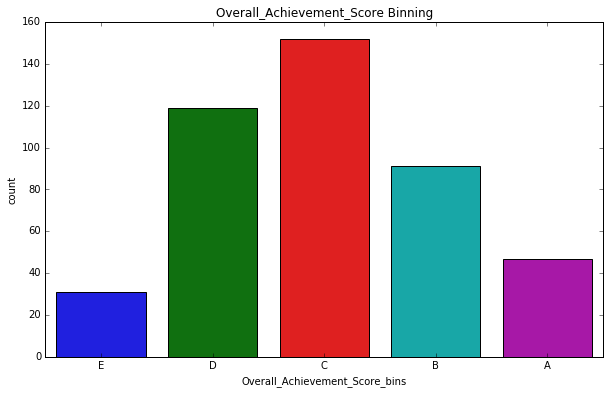

In [16]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Overall_Achievement_Score_bins", data=new_schooldata )
plt.title('Overall_Achievement_Score Binning')

In [17]:
new_schooldata.head().T

116                   122  \
unit_code                         100307                100326                 
category_cd                       H                     H                      
calendar_only_txt                 Traditional Calendar  Traditional Calendar   
title1_type_flg                   False                 False                  
clp_ind_flg                       False                 False                  
focus_clp_flg                     False                 False                  
summer_program_flg                False                 False                  
esea_status                       Non_Esea              Non_Esea               
student_num                       311                   1033                   
lea_avg_student_num               947                   947                    
Grad_project_status               True                  True                   
stem_flg                          True                  False                  
Avg_Class_Size_Biology            21                    21                     
Avg_Class_Size_EnglishII          16                    18                     
Avg_Class_Size_MathI              12                    18                     
Avg_Dist_Size_Biology             18                    18                     
Avg_Dist_Size_EnglishII           18                    18                     
Avg_Dist_Size_MathI               18                    18                     
lea_total_expense_num             9324.04               9324.04                
lea_salary_expense_pct            0.613                 0.613                  
lea_benefits_expense_pct          0.212                 0.212                  
lea_services_expense_pct          0.084                 0.084                  
lea_supplies_expense_pct          0.081                 0.081                  
lea_instruct_equip_exp_pct        0.01                  0.01                   
lea_federal_perpupil_num          1091                  1091                   
lea_local_perpupil_num            2667.56               2667.56                
lea_state_perpupil_num            5565.48               5565.48                
SPG Grade                         A                     C                      
SPG Score                         95                    63                     
EVAAS Growth Status               Exceeded              Met                    
...                                    ...              ...                    
Dist_Tch_Exp_Pct_10+_Years        0.533                 0.533                  
Dist_Prin_Exp_Pct_0_3_Years       0.526                 0.526                  
Dist_Prin_Exp_Pct_4_10_Years      0.368                 0.368                  
Dist_Prin_Exp_Pct_10+_Years       0.105                 0.105                  
ACT_Composite_Score_UNC_Min       100                   48.6                   
ACT_English_Benchmark             83.1                  30.9                   
ACT_Math_Benchmark                60                    18.2                   
ACT_Pct_of_Benchmarks_Met         60.6                  20.7                   
ACT_Reading_Benchmark             61.5                  21.4                   
ACT_Science_Benchmark             52.3                  15.9                   
ACT_WorkKeys_Silver_Beyond        74.2                  52.6                   
ACT_Writing_Benchmark             46.2                  17                     
All_EOC_Subjects_CACR             85.3                  38.9                   
All_EOC_Subjects_GLP              93.3                  50.7                   
All_EOG_EOC_Subjects_CACR         85.3                  38.9                   
All_EOG_EOC_Subjects_GLP          93.3                  50.7                   
EOC_Biology_CACR                  83.1                  49                     
EOC_Biology_GLP                   90.4                  59.4                   
EOC_English_2_CACR                93.8             

Text(0.5,1,'EVAAS Growth Status')

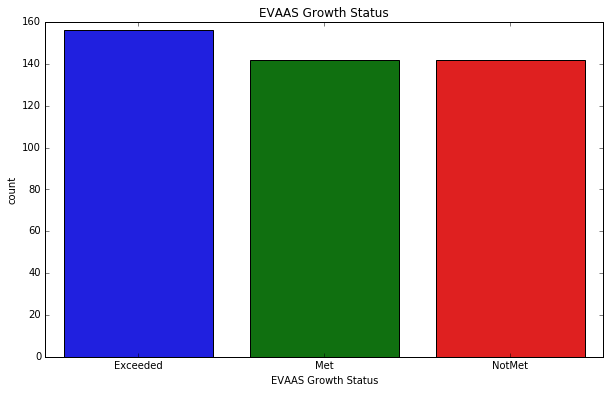

In [18]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="EVAAS Growth Status", data=new_schooldata )
plt.title('EVAAS Growth Status')

> majority of the schools have average overrall achievement score bin 56-69. For classification we will create dummy variable for each of this 5 bins.

Text(0.5,1,'SchoolWeightedScore')

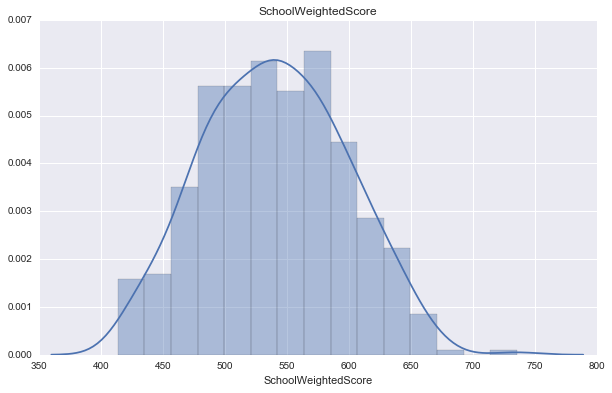

In [19]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(new_schooldata.SchoolWeightedScore);
plt.title('SchoolWeightedScore')

Text(0.5,1,'Above_NC_AVG_Graduation_Rate4_Yr')

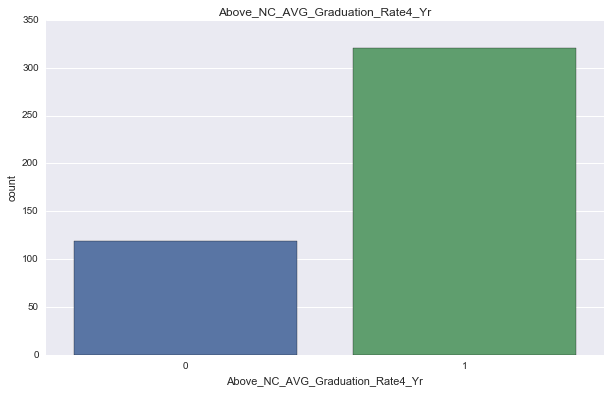

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Above_NC_AVG_Graduation_Rate4_Yr", data=new_schooldata )
plt.title('Above_NC_AVG_Graduation_Rate4_Yr')

In [21]:
modelingdata=School_Final.copy()
modelingdata.head().T

116                   122  \
unit_code                         100307                100326                 
category_cd                       H                     H                      
calendar_only_txt                 Traditional Calendar  Traditional Calendar   
title1_type_flg                   False                 False                  
clp_ind_flg                       False                 False                  
focus_clp_flg                     False                 False                  
summer_program_flg                False                 False                  
esea_status                       Non_Esea              Non_Esea               
student_num                       311                   1033                   
lea_avg_student_num               947                   947                    
Grad_project_status               True                  True                   
stem_flg                          True                  False                  
Avg_Class_Size_Biology            21                    21                     
Avg_Class_Size_EnglishII          16                    18                     
Avg_Class_Size_MathI              12                    18                     
Avg_Dist_Size_Biology             18                    18                     
Avg_Dist_Size_EnglishII           18                    18                     
Avg_Dist_Size_MathI               18                    18                     
lea_total_expense_num             9324.04               9324.04                
lea_salary_expense_pct            0.613                 0.613                  
lea_benefits_expense_pct          0.212                 0.212                  
lea_services_expense_pct          0.084                 0.084                  
lea_supplies_expense_pct          0.081                 0.081                  
lea_instruct_equip_exp_pct        0.01                  0.01                   
lea_federal_perpupil_num          1091                  1091                   
lea_local_perpupil_num            2667.56               2667.56                
lea_state_perpupil_num            5565.48               5565.48                
SPG Grade                         A                     C                      
SPG Score                         95                    63                     
EVAAS Growth Status               Exceeded              Met                    
...                                    ...              ...                    
Tch_Exp_Pct_10+_Years             0.75                  0.406                  
Dist_Tch_Exp_Pct_0_3_Years        0.262                 0.262                  
Dist_Tch_Exp_Pct_4_10_Years       0.205                 0.205                  
Dist_Tch_Exp_Pct_10+_Years        0.533                 0.533                  
Dist_Prin_Exp_Pct_0_3_Years       0.526                 0.526                  
Dist_Prin_Exp_Pct_4_10_Years      0.368                 0.368                  
Dist_Prin_Exp_Pct_10+_Years       0.105                 0.105                  
ACT_Composite_Score_UNC_Min       100                   48.6                   
ACT_English_Benchmark             83.1                  30.9                   
ACT_Math_Benchmark                60                    18.2                   
ACT_Pct_of_Benchmarks_Met         60.6                  20.7                   
ACT_Reading_Benchmark             61.5                  21.4                   
ACT_Science_Benchmark             52.3                  15.9                   
ACT_WorkKeys_Silver_Beyond        74.2                  52.6                   
ACT_Writing_Benchmark             46.2                  17                     
All_EOC_Subjects_CACR             85.3                  38.9                   
All_EOC_Subjects_GLP              93.3                  50.7                   
All_EOG_EOC_Subjects_CACR         85.3                  38.9                   
All_EOG_EOC_Subjects_GLP          93.3             

>The code block below is derived from taken from Dr. Drews notebook on. We create dummy variables.

In [22]:
%%time
modelingdata=School_Final.copy()
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == object) |(schoolDataFinal.dtypes == 'category')|(schoolDataFinal.dtypes == bool)]
    
    
    print(SchoolDataCat.columns)
    cat_vars1=SchoolDataCat.columns
    cat_vars=cat_vars1.copy()
    cat_vars=cat_vars1.drop('unit_code')
    #cat_vars=cat_vars.drop('Overall_Achievement_Score_bins')
    print(cat_vars)
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars1=SchoolDataCat.columns
    cat_vars=cat_vars1.drop('unit_code')
    #cat_vars=cat_vars.drop('Overall_Achievement_Score_bins')
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]
    print(to_keep)
    #to_keep =to_keep.append('EVAAS Growth Status')

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    #y=['EVAAS Growth Status']
    #X=[i for i in data_final_vars if i not in y]
 
    #list(data_final_vars)
    #print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final)
    
modelingdata = dummy_Create(modelingdata)


Index(['unit_code', 'category_cd', 'calendar_only_txt', 'title1_type_flg',
       'clp_ind_flg', 'focus_clp_flg', 'summer_program_flg', 'esea_status',
       'Grad_project_status', 'stem_flg', 'SPG Grade', 'EVAAS Growth Status',
       'Byod', '1_to_1_access', 'Overall_Achievement_Score_bins'],
      dtype='object')
Index(['category_cd', 'calendar_only_txt', 'title1_type_flg', 'clp_ind_flg',
       'focus_clp_flg', 'summer_program_flg', 'esea_status',
       'Grad_project_status', 'stem_flg', 'SPG Grade', 'EVAAS Growth Status',
       'Byod', '1_to_1_access', 'Overall_Achievement_Score_bins'],
      dtype='object')
['unit_code', 'student_num', 'lea_avg_student_num', 'Avg_Class_Size_Biology', 'Avg_Class_Size_EnglishII', 'Avg_Class_Size_MathI', 'Avg_Dist_Size_Biology', 'Avg_Dist_Size_EnglishII', 'Avg_Dist_Size_MathI', 'lea_total_expense_num', 'lea_salary_expense_pct', 'lea_benefits_expense_pct', 'lea_services_expense_pct', 'lea_supplies_expense_pct', 'lea_instruct_equip_exp_pct', 'lea_fe

In [23]:
modelingdata.head().T

116      122      124      132  \
unit_code                              100307   100326   100334   100348    
student_num                            311      1033     1096     1346      
lea_avg_student_num                    947      947      947      947       
Avg_Class_Size_Biology                 21       21       21       20        
Avg_Class_Size_EnglishII               16       18       21       20        
Avg_Class_Size_MathI                   12       18       17       17        
Avg_Dist_Size_Biology                  18       18       18       18        
Avg_Dist_Size_EnglishII                18       18       18       18        
Avg_Dist_Size_MathI                    18       18       18       18        
lea_total_expense_num                  9324.04  9324.04  9324.04  9324.04   
lea_salary_expense_pct                 0.613    0.613    0.613    0.613     
lea_benefits_expense_pct               0.212    0.212    0.212    0.212     
lea_services_expense_pct               0.084    0.084    0.084    0.084     
lea_supplies_expense_pct               0.081    0.081    0.081    0.081     
lea_instruct_equip_exp_pct             0.01     0.01     0.01     0.01      
lea_federal_perpupil_num               1091     1091     1091     1091      
lea_local_perpupil_num                 2667.56  2667.56  2667.56  2667.56   
lea_state_perpupil_num                 5565.48  5565.48  5565.48  5565.48   
SPG Score                              95       63       74       74        
EVAAS Growth Score                     89.6     80.6     90.9     90.9      
Overall Achievement Score              100      59       70       70        
Math I Score                           95       30       59       63        
English II Score                       100      49       57       59        
Biology Score                          88       54       66       57        
The ACT Score                          100      48       66       62        
Math Course Rigor Score                100      100      100      100       
Cohort Graduation Rate Standard Score  100      85       84       83        
sat_avg_score_num                      1067     908      1023     963       
lea_sat_avg_score_num                  963      963      963      963       
sat_participation_pct                  0.12     0.4      0.28     0.53      
...                                     ...     ...       ...      ...      
clp_ind_flg_False                      1        1        1        1         
clp_ind_flg_True                       0        0        0        0         
focus_clp_flg_False                    1        1        1        1         
focus_clp_flg_True                     0        0        0        0         
summer_program_flg_False               1        1        1        1         
summer_program_flg_True                0        0        0        0         
esea_status_Esea_Fail                  0        0        0        0         
esea_status_Esea_Pass                  0        0        0        0         
esea_status_Non_Esea                   1        1        1        1         
Grad_project_status_False              0        0        0        0         
Grad_project_status_True               1        1        1        1         
stem_flg_False                         0        1        1        1         
stem_flg_True                          1        0        0        0         
SPG Grade_A                            1        0        0        0         
SPG Grade_A+NG                         0        0        0        0         
SPG Grade_B                            0        0        1        1         
SPG Grade_C                            0        1        0        0         
SPG Grade_D                            0        0        0        0         
EVAAS Growth Status_Exceeded           1        0        1        1         
EVAAS Growth Status_Met                0        1        0        0         
EVAAS Growth Status_NotMet             

In [24]:
modelingdata.to_csv('data.csv')

> **NOTE: Switch the Kernel to R before running the cells below**

<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>
<font color=black>Cluster Analysis: Modeling and Evaluation</font>
</h1></div>

In [1]:
# load required packages
# Use pacman to load packages. 
# Running this for the first time might take time depending on whether
# these packages are already installed or not. 
install.packages("pacman", repos = "http://cran.us.r-project.org")
pacman::p_load(pacman,tidyverse,cluster,factoextra, dplyr, 
               readxl, ggplot2, mclust, NbClust, clValid,
               reshape2, fpc, radiant, pvclust,
               cowplot, gridExtra)

#### Clustering Dataset

***data.csv*** that we import below is data from preprocessing and cleaning step in LAB2.  We created dummy variables for categorical variables except for *Above_NC_AVG_Graduation_Rate4_Yr*. 

We wrote our data after preprocessing in a csv file for easy import in R which was our language of choice for lab 3. 

In [2]:
data<-read.csv('data.csv')

In [3]:
rownames(data) <- data$unit_code
data$unit_code <- NULL # delete the index column
data$X <- NULL # delete the index column
head(data)

student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI lea_total_expense_num
100307  311        947                 21                     16                       12                   18                    18                      18                  9324.04              
100326 1033        947                 21                     18                       18                   18                    18                      18                  9324.04              
100334 1096        947                 21                     21                       17                   18                    18                      18                  9324.04              
100348 1346        947                 20                     20                       17                   18                    18                      18                  9324.04              
110304 1279        779                 22                     23                       21                   19                    19                      22                  9079.74              
110322  268        779                 19                     19                       19                   19                    19                      22                  9079.74              
       lea_salary_expense_pct ⋯ EVAAS.Growth.Status_NotMet Byod_No Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D
100307 0.613                  ⋯ 0                          0       1        0                 1                  0                                0                               
100326 0.613                  ⋯ 0                          0       1        1                 0                  0                                1                               
100334 0.613                  ⋯ 0                          1       0        1                 0                  0                                0                               
100348 0.613                  ⋯ 0                          0       1        1                 0                  0                                0                               
110304 0.652                  ⋯ 0                          0       1        1                 0                  0                                0                               
110322 0.652                  ⋯ 0                          1       0        1                 0                  0                                0                               
       Overall_Achievement_Score_bins_C Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
100307 0                                0                                1                               
100326 0                                0                                0                               
100334 1                                0                                0                               
100348 1                                0                                0                               
110304 0                                1                                0                               
110322 0                                0                                1

In [4]:
str(data) # peak at the data

'data.frame':	440 obs. of  154 variables:
 $ student_num                                   : num  311 1033 1096 1346 1279 ...
 $ lea_avg_student_num                           : num  947 947 947 947 779 779 779 779 779 779 ...
 $ Avg_Class_Size_Biology                        : num  21 21 21 20 22 19 20 21 19 18 ...
 $ Avg_Class_Size_EnglishII                      : num  16 18 21 20 23 19 20 21 20 17 ...
 $ Avg_Class_Size_MathI                          : num  12 18 17 17 21 19 19 22 17 20 ...
 $ Avg_Dist_Size_Biology                         : num  18 18 18 18 19 19 19 19 19 19 ...
 $ Avg_Dist_Size_EnglishII                       : num  18 18 18 18 19 19 19 19 19 19 ...
 $ Avg_Dist_Size_MathI                           : num  18 18 18 18 22 22 21 22 22 22 ...
 $ lea_total_expense_num                         : num  9324 9324 9324 9324 9080 ...
 $ lea_salary_expense_pct                        : num  0.613 0.613 0.613 0.613 0.652 0.652 0.652 0.652 0.652 0.652 ...
 $ lea_benefits_expense_pct  

In [5]:
dim(data)

[1] 440 154

Our starting dataset has 154 features and 440 instances. 

> From the summary above, we note our features are not on the same scale. This could be a problem especially in the selection of Principal components as high variance features would always dominate. We proceed to split our data to training set and class labels then standardize our training data to bring all features to the same scale.

### Splitting data to training set and labels

In [6]:
summary(as.factor(data$Above_NC_AVG_Graduation_Rate4_Yr))

0   1 
119 321

In [7]:
# create the data to cluster on and the class variable
data.new<- data[,-which(names(data) %in% c('Above_NC_AVG_Graduation_Rate4_Yr'))]
data.class<- data[,'Above_NC_AVG_Graduation_Rate4_Yr']

In [8]:
head(data.class)

[1] 1 0 0 1 1 1

### Data Scaling

In [9]:
set.seed(1000000)
print('Before scaling')
head(data.new,2)
scaled_data.new<- data.new %>% mutate_each_(funs(scale(.) %>% as.vector), 
                             vars=c(names(data.new)))

rownames(scaled_data.new) <- rownames(data.new)

print('After scaling')
head(scaled_data.new,2)

[1] "Before scaling"


student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI lea_total_expense_num
100307  311        947                 21                     16                       12                   18                    18                      18                  9324.04              
100326 1033        947                 21                     18                       18                   18                    18                      18                  9324.04              
       lea_salary_expense_pct ⋯ EVAAS.Growth.Status_NotMet Byod_No Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D
100307 0.613                  ⋯ 0                          0       1        0                 1                  0                                0                               
100326 0.613                  ⋯ 0                          0       1        1                 0                  0                                1                               
       Overall_Achievement_Score_bins_C Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
100307 0                                0                                1                               
100326 0                                0                                0

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`


[1] "After scaling"


student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI lea_total_expense_num
100307 -0.9784000  0.2440835           0.2964675              -0.8996305               -1.5896839           -0.2591576            -0.4089608              -0.9317166          0.1882198            
100326  0.2219387  0.2440835           0.2964675              -0.4571069               -0.2385038           -0.2591576            -0.4089608              -0.9317166          0.1882198            
       lea_salary_expense_pct ⋯ EVAAS.Growth.Status_NotMet Byod_No   Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D
100307 -0.5353714             ⋯ -0.6895122                 -1.341063 1.341063 -1.6500339         1.6500339         -0.2749952                       -0.6081727                      
100326 -0.5353714             ⋯ -0.6895122                 -1.341063 1.341063  0.6046708        -0.6046708         -0.2749952                        1.6405329                      
       Overall_Achievement_Score_bins_C Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
100307 -0.7256571                       -0.5100514                        2.8883729                      
100326 -0.7256571                       -0.5100514                       -0.3454288

integer(0)

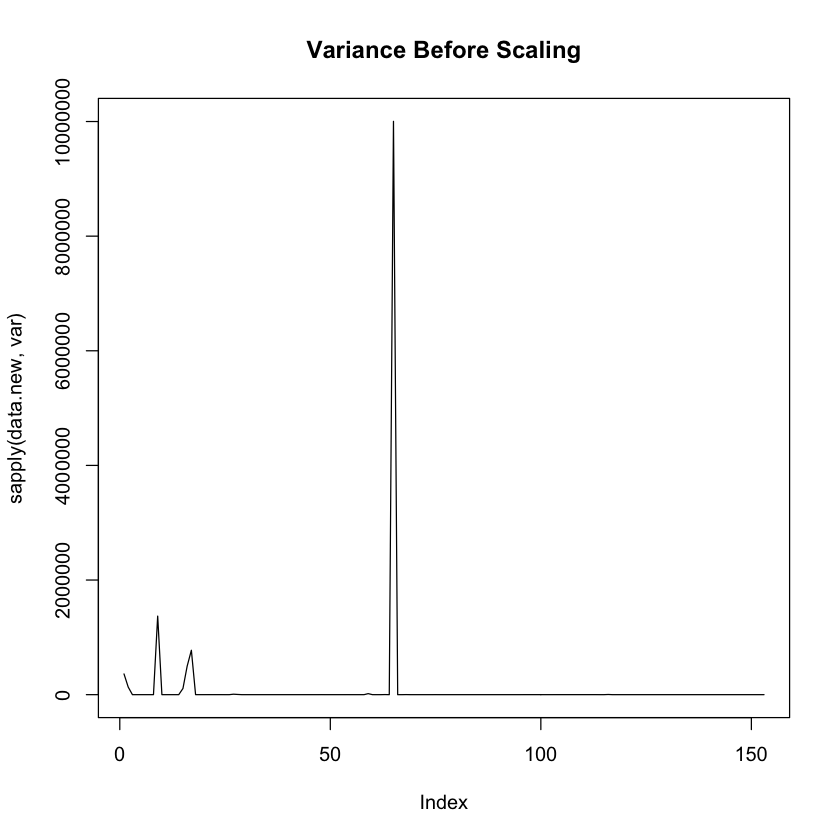

integer(0)

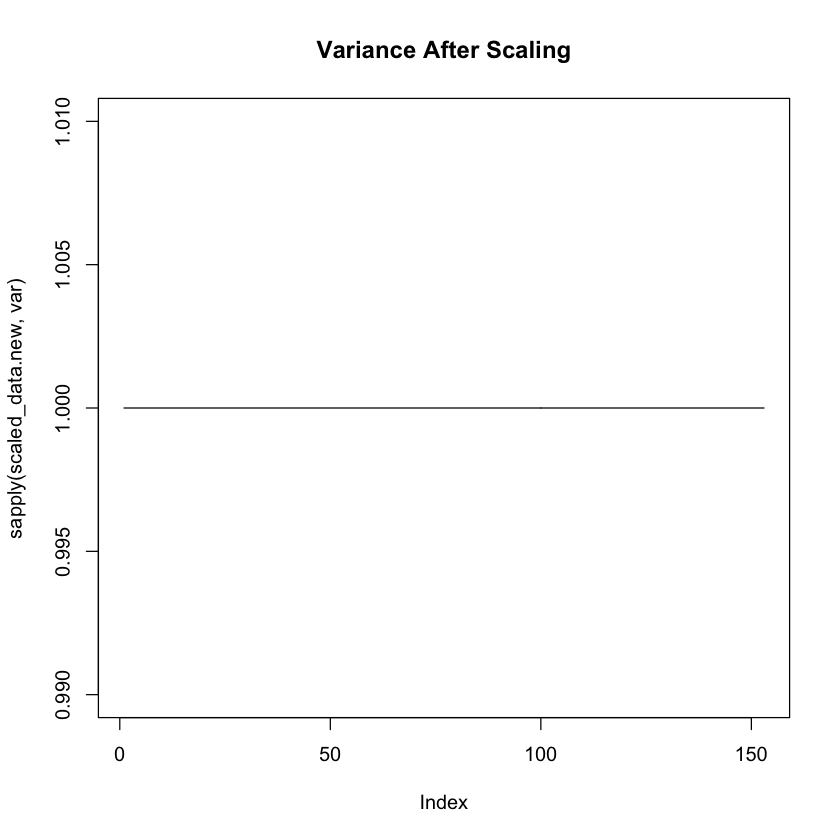

In [10]:
# Checking variance is uniform
plot(sapply(data.new, var),  t='l')+title('Variance Before Scaling')
# Verify variance is uniform
plot(sapply(scaled_data.new, var),  t='l')+title('Variance After Scaling')

In the above plot we verify equal variance on the scaled data.

### Dimensionality Reduction

> Since our dataset has 154 features we thought this was a great opportunity for us to practice dimensionality reduction to make our data visualization much easier. Below we show a sample of what a daunting task it would be visualizing our dataset with full 154 features. 

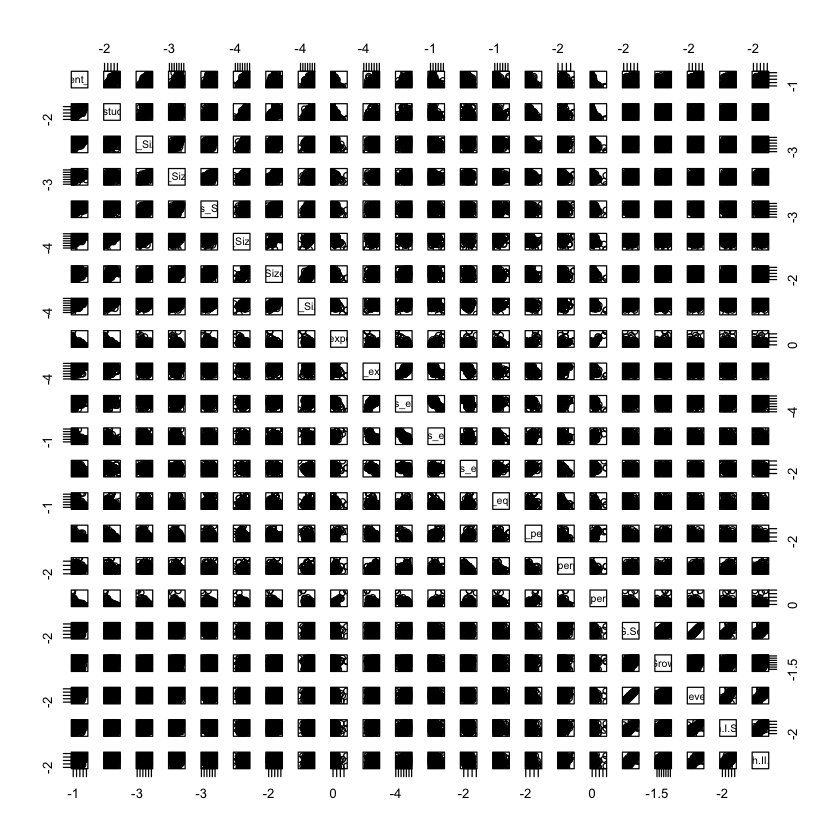

In [11]:
plot(scaled_data.new[,1:22])

In [14]:
# the funct,ion below will beused to display scree plots for selection of PCAs. 
# The code is adopted from http://rstudio-pubs-static.s3.amazonaws.com/27823_dbc155ba66444eae9eb0a6bacb36824f.html
pcaCharts <- function(x) {
    x.var <- x$sdev ^ 2
    x.pvar <- x.var/sum(x.var)
    #print("proportions of variance:")
    #print(x.pvar)
    
    par(mfrow=c(2,2))
    plot(x.pvar,xlab="Principal component", ylab="Proportion of variance explained", ylim=c(0,1), type='b')
    plot(cumsum(x.pvar),xlab="Principal component", ylab="Cumulative Proportion of variance explained", ylim=c(0,1), type='b')
    screeplot(x)
    screeplot(x,type="l")
    par(mfrow=c(1,1))
}

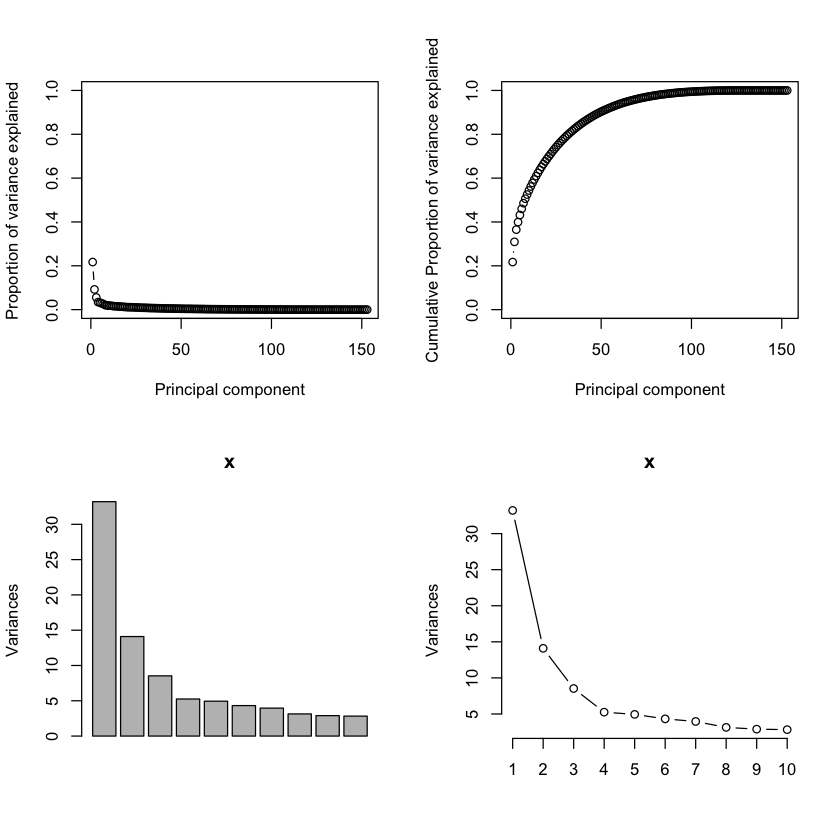

In [15]:
# Get principal component vectors using prcomp 
pc <- prcomp(scaled_data.new)
pcaCharts(pc)

> Looking at the summary of Principal components above, we note that 4 Principal components account for a majority of the variance in our education data. This helps us reduce our target visualization from 154 features to 4. 

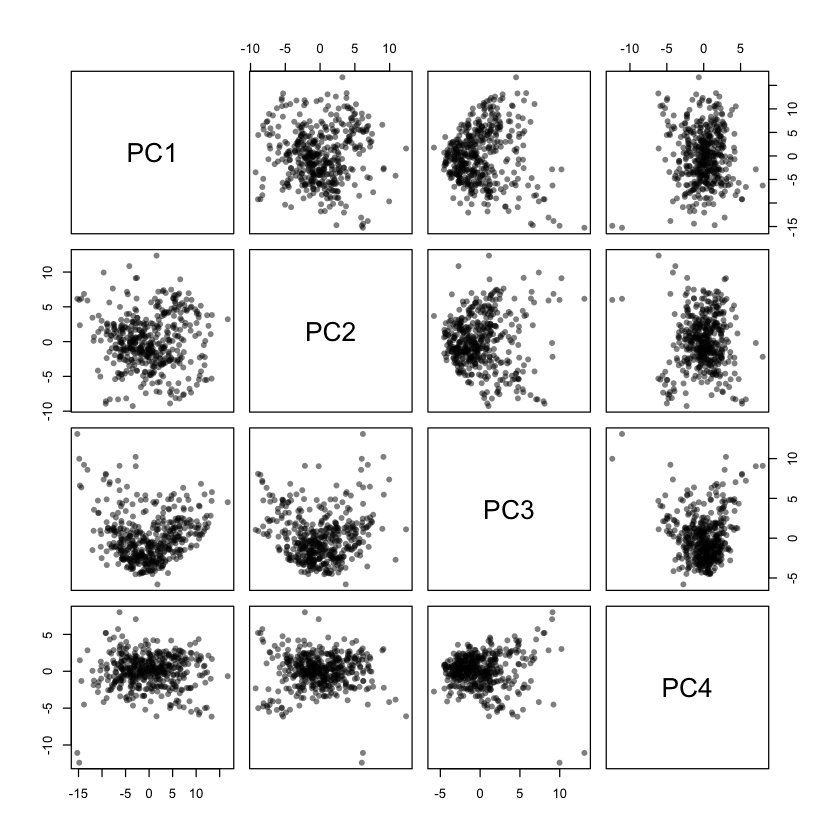

In [16]:
# First four principal components
comp <- data.frame(pc$x[,1:4])
# Plot
plot(comp, pch=16, col=rgb(0,0,0,0.5))

<div class="alert alert-info"><h1>

<font color=black> Train and adjust parameters</font>
</h1></div>


#### Reference: 
* https://www.r-bloggers.com/k-means-clustering-in-r/
* https://uc-r.github.io/kmeans_clustering
* http://www.saedsayad.com/clustering_kmeans.htm
* http://www.sthda.com/english/articles/30-advanced-clustering/104-model-based-clustering-essentials/


<div class="alert alert-info"><h2>

<font color=red>1. Kmeans Clustering</font>
</h2></div>


K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. For our North Carolina High school Education dataset, we will be aiming to group schools with the greatest similarity together. 

As we will see below, K-Means is a relatively an efficient method. However, we need to specify the number of clusters, in advance and the conclusive results are sensitive to initialization and often terminates at a local optimum. A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion. In general, a large k decreases the error but increases the risk of overfitting. 

For K-means clustering, we chose to use k and nstart as parameters to play with to tune our model: 
* **Centers (k)** - number of clusters. Choosing k is a nagging problem in K-means cluster analysis. There is no agreed upon solution. Sometimes, people just declare it arbitrarily. We will use both a manual approach where we will vary K and visually evaluate the clusters and use other standardized approaches. We will vary K = {2, 3, 5, 7} in the following code blocks. 

* **nstart** - Defines how many random sets should be chosen. nstart attempts multiple initial configurations and reports on the best clustering configuration.


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



[1] "clustering with centers(k) =2"
[1] "Clusters content"


[1] 251 189

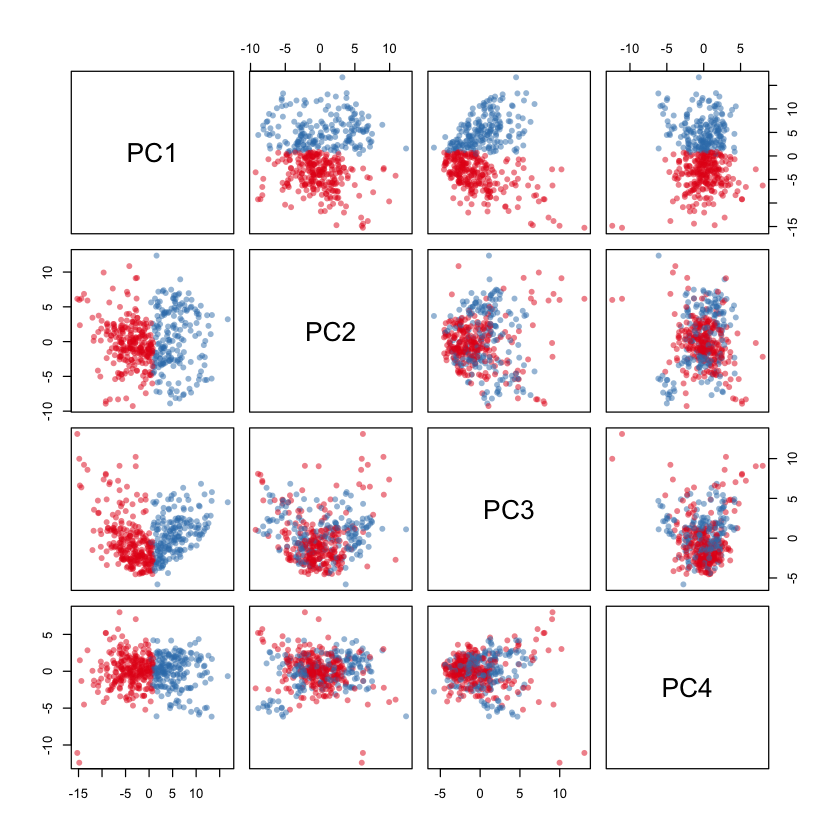

In [17]:
# Apply k-means with k=2
k2 <- kmeans(comp, 2, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =2')

print('Clusters content')
k2$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k2$clust, pch=16)

#pulling the first two dimensions only to compare later on
p2 <- fviz_cluster(k2, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2")


In [18]:
# How does the clustering model do?
table(data.frame(data.class, k2$cluster))

          k2.cluster
data.class   1   2
         0 111   8
         1 140 181

[1] "clustering with centers(k) =3"
[1] "Clusters content"


[1] 185 116 139

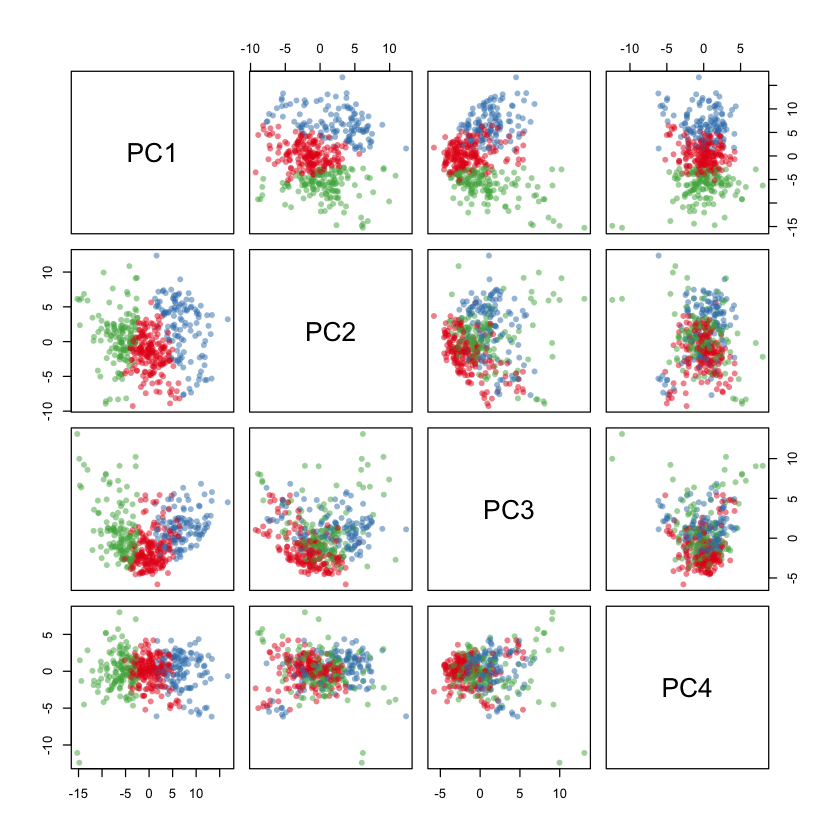

In [19]:
# Apply k-means with k=3
k3 <- kmeans(comp, 3, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =3')
print('Clusters content')
k3$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k3$clust, pch=16)


#pulling the first two dimensions only to compare later on
p3 <- fviz_cluster(k3, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 3")

[1] "clustering with centers(k) =5"
[1] "Clusters content"


[1] 142 126  39  84  49

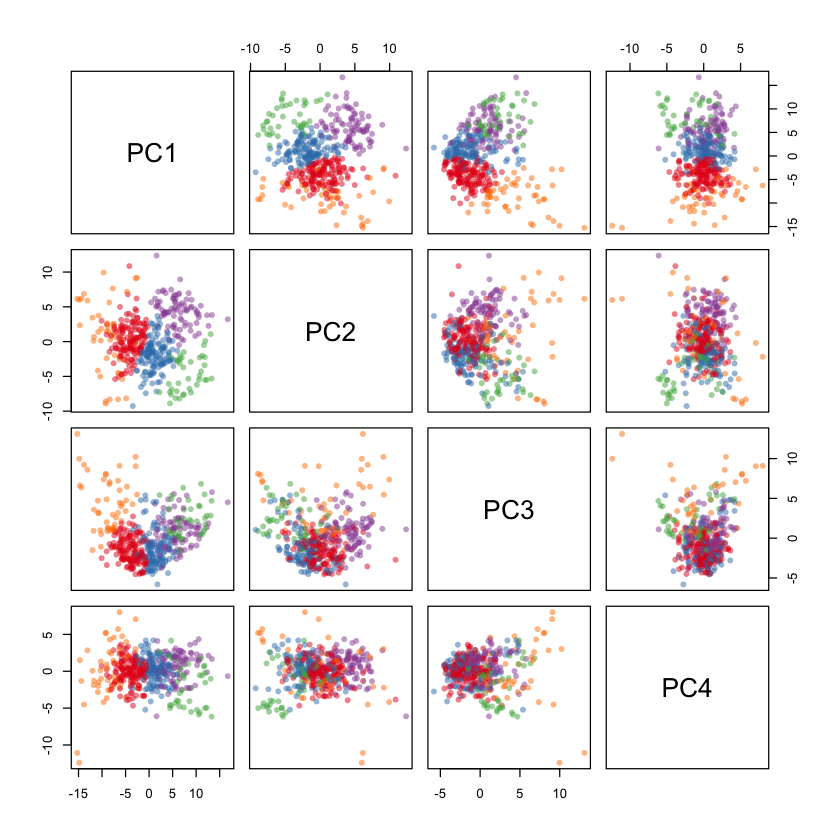

In [20]:
# Apply k-means with k=5
k5 <- kmeans(comp, 5, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =5')
print('Clusters content')
k5$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k5$clust, pch=16)


#pulling the first two dimensions only to compare later on
p5 <- fviz_cluster(k5, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 5")

[1] "clustering with centers(k) =7"
[1] "Clusters content"


[1]  22  91 104  90  35  82  16

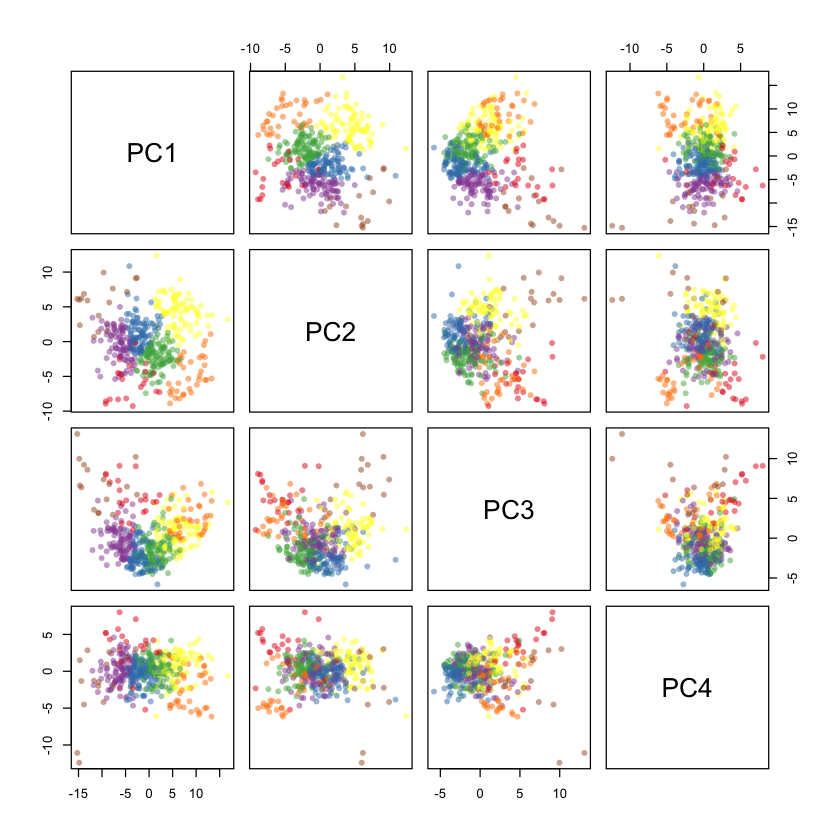

In [21]:
# Apply k-means with k=7
k7 <- kmeans(comp, 7, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =7')
print('Clusters content')
k7$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k7$clust, pch=16)

#pulling the first two dimensions only to compare later on
p7 <- fviz_cluster(k7, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 7")

###  A closer look at the first two Principal components with different selected centers

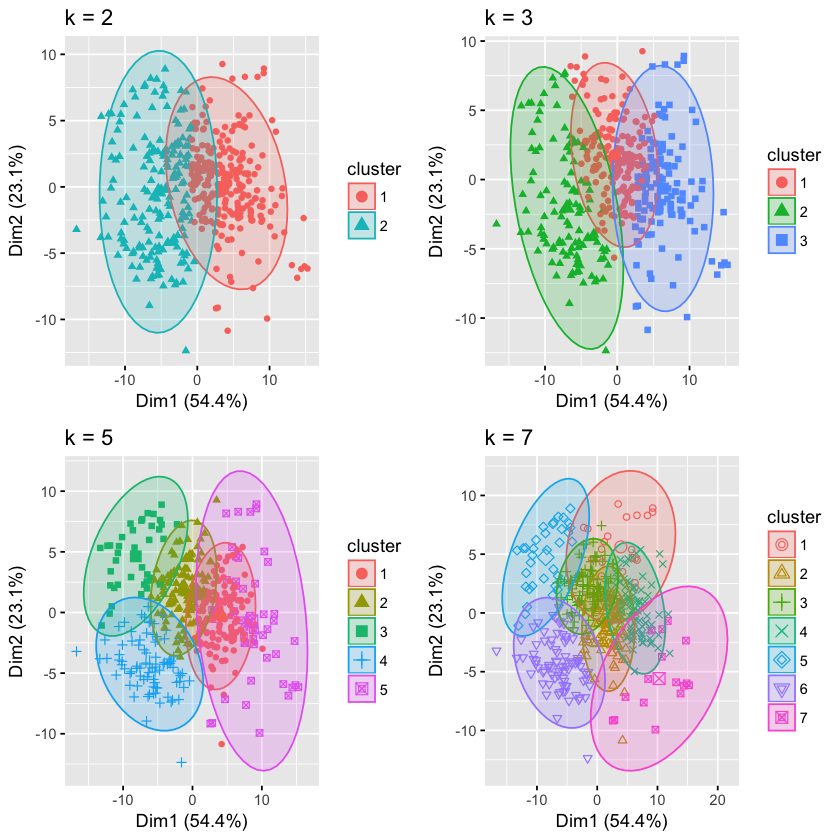

In [22]:
# plots to compare
grid.arrange(p2, p3,p5, p7, nrow=2)

> In the code blocks above, we varied K = (2,3,5,7) and visually displayed the first 4 PCAs. On our North Carolina education data, we note better clustering at lower number of centers. Taking a closer look at the visualizations above narrowing to the first two dimensions only, 2 or 3 centers give us the optimal number of clusters. With 2/3 clusters, the clusters are well separated compared to when we increase the number of clusters to 5 or 7. We can conclude, for our North Carolina dataset, when we use more than 3 centers. Since it is always a good idea to go with a lower number of cluster centers, for our analysis we will proceed with two clusters.

### Varying nstart

> Now that we have determined our optimal number of clusters to be 2, let’s check the effect of varying nstart. Varying nstart (number of random sets chosen) seems to have no effect on the clusters assignments of our dataset. This implies that our dataset with k =2 is well separated and stable.

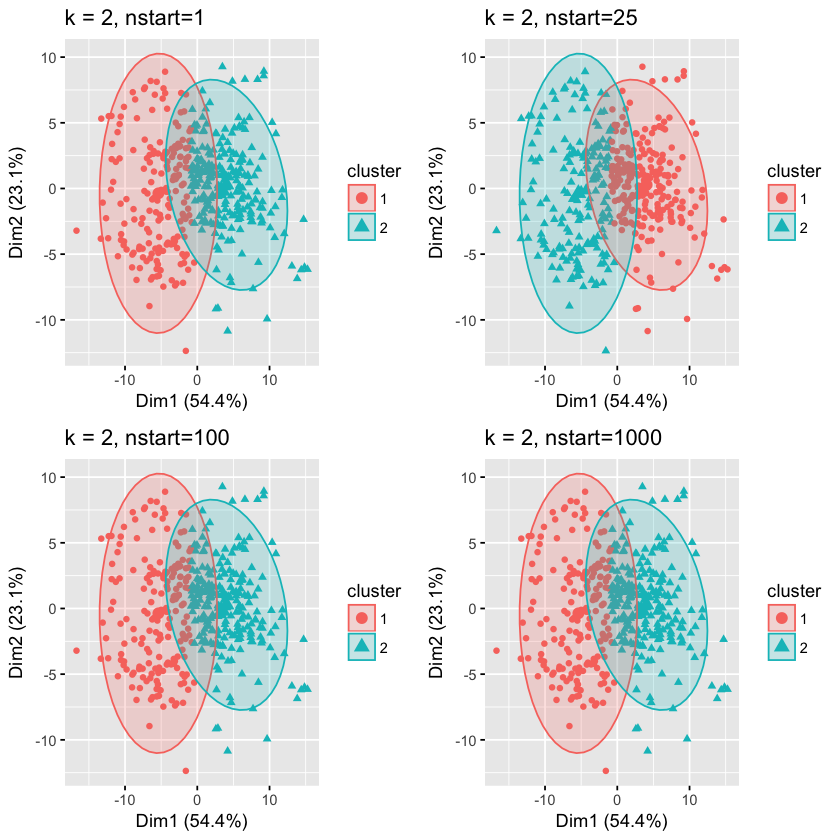

In [23]:
n1 <- kmeans(comp, 2, nstart=1, iter.max=1000)
n25 <- kmeans(comp, 2, nstart=25, iter.max=1000)
n100 <- kmeans(comp, 2, nstart=100, iter.max=1000)
n1000<-kmeans(comp, 2, nstart=1000, iter.max=1000)

#pulling the first two dimensions only to compare later on
c1 <- fviz_cluster(n1, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=1")
c2 <- fviz_cluster(n25, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=25")
c3 <- fviz_cluster(n100, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=100")
c4 <- fviz_cluster(n1000, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=1000")

# plots to compare
grid.arrange(c1, c2,c3, c4, nrow=2)


<div class="alert alert-info"><h2>

<font color=red>2. Hierarchical Clustering</font>
</h2></div>

Hierarchical Clustering is a cluster analysis method, which produces a tree-based representation (i.e dendrogram) of the data. It starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named a dendrogram.

Steps for hierarchical clustering:
- Prepare the data by scaling
- Compute the distance matrix between each pair of objects in the dataset.
- Use a linkage function to group objects into hierarchical cluster tree. Objects/clusters that are in close proximity are linked together using the  linkage function
- Determine where to cut the tree into clusters. This creates a partition of the data.

Here, we will be using the `comp` dataframe which contains the first ten principal components. As a reminder, we scaled the data and applied `prcomp` and based on the scree-plot analysis, decided to use the first ten principal components. 

In [24]:
head(comp)

PC1        PC2        PC3        PC4       
100307  9.0229555  6.0061892  1.5639894  2.4623058
100326 -3.3192032 -0.1868437 -0.8819400  1.1230804
100334  0.6390179  0.2389147 -0.8316678 -0.2907569
100348  0.4159025 -0.4004568 -1.0643690  0.5184308
110304  4.4152479 -2.6242122 -1.4027637  0.5973726
110322 10.0907127  2.6750957 -0.9244498  1.5722069

In [25]:
dim(comp)

[1] 440   4

In order to decide which objects/clusters should be combined we need methods for measuring similarity between objects. In R we can use the `dist()` function to compute the distance between every pair of objects in the dataset. The result is called a dissimilarity or distance matrix. By default, dist() function computes the Euclidean distance between objects. 

In [26]:
# make a copy 
hrc <- comp

In [27]:
# calculate the distance matrix
hrc.dist <- dist(hrc)

The linkage function takes the distance information, returned by the function dist(), and groups pairs of objects into clusters based on their similarity. Next, these newly formed clusters are linked to each other to create bigger clusters. This process is iterated until all the objects in the original data set are linked together in a hierarchical tree. 

In [28]:
# Use complete linkage method
hrc.link <- hclust(d = hrc.dist, method="complete")

- `d`: distance matrix
- `method`: The linkage method used. There are many agglomeration (linkage) methods, of which "`complete or maximum`" linkage is one of them. In complete linkage method, the distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster2. It tends to produce more compact clusters.

Dendrograms correspond to the graphical representation of the hierarchical tree generated by the function `hclust()`. Dendrograms can be produced in R using the base function `plot(hrc.link)`, where hrc.link is the output of hclust(). Here, we will use the function `fviz_dend()` of the `factoextra` R package to produce beautiful dendrograms. 


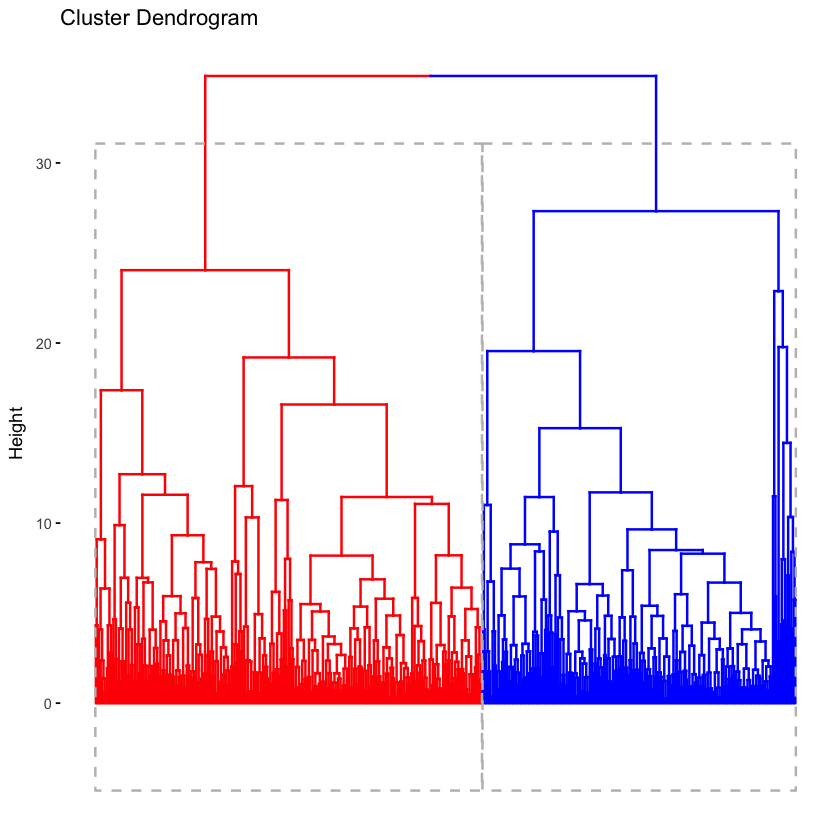

In [29]:
# Cut the dendrogram into 2 groups
fviz_dend(hrc.link, k=2, # Cut into 2 groups
          show_labels= F, # don't show labels
         k_colors = c("red", "blue"),
         rect = T)

#fviz_dend(hrc.link, cex=0.5, show_labels = F)

In the dendrogram displayed above, each leaf corresponds to one object. As we move up the tree, objects that are similar to each other are combined into branches, which are themselves fused at a higher height. The height of the fusion, provided on the vertical axis, indicates the (dis)similarity/distance between two objects/clusters. The higher the height of the fusion, the less similar the objects are.

In order to identify sub-groups, we can cut the dendrogram at a certain height. One of the problems with hierarchical clustering is that, it does not tell us how many clusters there are, or where to cut the dendrogram to form clusters. You can cut the hierarchical tree at a given height in order to partition our data into clusters. The R base function `cutree()` can be used to cut a tree, generated by the `hclust()` function, into several groups either by specifying the desired number of groups or the cut height. It returns a vector containing the cluster number of each observation.

In [30]:
hrc.clusters <- cutree(hrc.link, k=2)

In [31]:
table(hrc.clusters)

hrc.clusters
  1   2 
243 197 

In [32]:
table(data.class)

data.class
  0   1 
119 321 

### Using ward.D2 as the linkage function


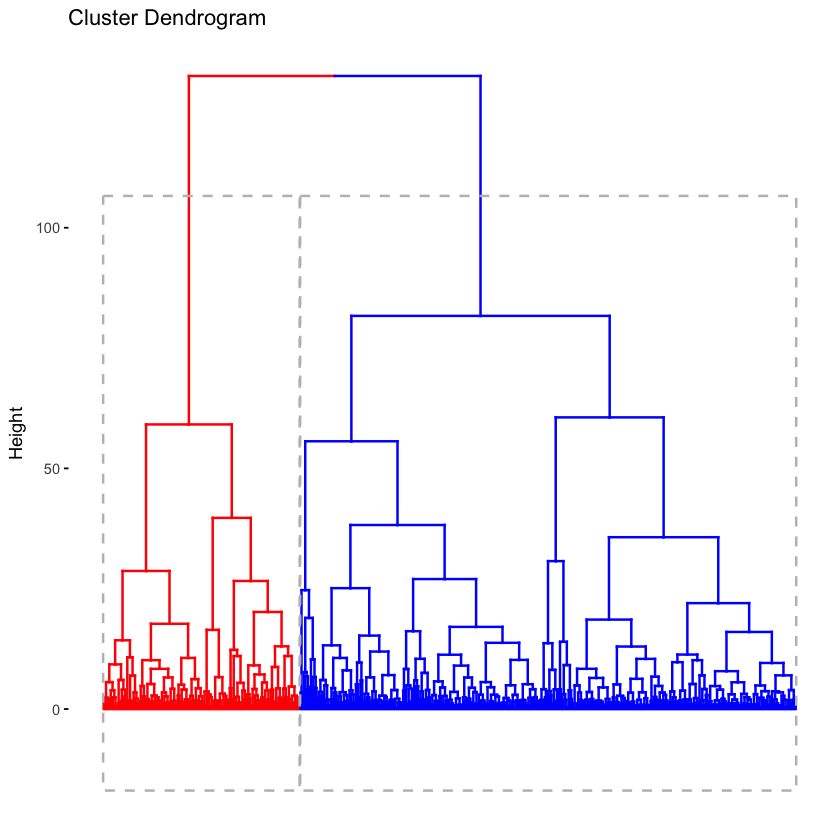

In [33]:
# Use complete linkage method
hrc.link.ward2 <- hclust(d = hrc.dist, method="ward.D2")

# Cut the dendrogram into 2 groups
fviz_dend(hrc.link.ward2, k=2, # Cut into 2 groups
          show_labels= F, # don't show labels
         k_colors = c("red", "blue"),
         rect = T)

Compare `ward.D2` linkage method performance.

In [34]:
hrc.ward2.clusters <- cutree(hrc.link.ward2, k=2)
table(hrc.ward2.clusters)

hrc.ward2.clusters
  1   2 
125 315 

In the next section we will evaluate and compare the clustering results of the above models.

<div class="alert alert-info"><h1>

<font color=black> Evaluate, Compare and Visualize Results</font>
</h1></div>

Here we tackle the internal and external validation schemes to evaluate the effectiveness of our clustering models. Secondly we show how to choose the optimal number of clusters for each method.

There are two ways in which we can validate the goodness of clustering algorithm results. 
 - `Internal cluster validation`: uses the internal information of the clustering process to evaluate the goodness of a clustering structure without reference to external information.
 - `External cluster validation`: consists of comparing the results of a clustering algorithm to an externally known result, such as externally provided class label. It measures the extent to which cluster labels match externally supplied class labels.
    
#### Internal measures for cluster validation
Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions. `Compactness` measures how close the objects are within the same cluster. A lower within-cluster variation is an indicator of good clustering. `Seperation`, measures how well-separated a cluster is from other clusters. `Connectivity` corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. Most of the indicies used for internal clustering use a combination of these three measures. The two most commonly used indices for assessing the goodness of clustering are `silhouette width` and `Dunn index`.
- `silhouette width`: measures the connectedness. Values of this index range from -1 to 1
    - Observations with a positive silhouette width close to 1 are very well clustered.
    - Observations with a small silhouette width close to 0 means that they lie between two clusters.
    - Observations with a negative silhouette width close to -1 are probably placed in the wrong cluster. 
- `Dunn index`: measures the compactness and well-separatedness. If the dataset contains compact and well-separated clusters, then the diameter of the clusters is expected to be small and the distance between the clusters is expected to be large. 
    - Dunn Index = min.separation/max.diameter
    - Dunn Index should be maximized.

#### External measures for cluster validation
The aim is to compare the identified clusters to an external reference. The agreement between clustering results and external reference can be quantified using `Corrected Rand index` which is implemented in R function `cluster.stats()` - fpc package.

### Internal measures for cluster validation: K-means
Here, we will calcuate the silhouette width and dunn index for various K-means models and evaluate which value of k gives the best results.

In [117]:
clt <- comp

# K-means models
km2 <- eclust(clt, "kmeans", k=2, nstart=25, graph = F)
km3 <- eclust(clt, "kmeans", k=3, nstart=25, graph = F)
km5 <- eclust(clt, "kmeans", k=5, nstart=25, graph = F)
km7 <- eclust(clt, "kmeans", k=7, nstart=25, graph = F)

In [118]:
km2_plot <- fviz_silhouette(km2, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  189          0.29
2       2  251          0.36


In [119]:
km3_plot <- fviz_silhouette(km3, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  185          0.33
2       2  139          0.19
3       3  116          0.25


In [120]:
km5_plot <- fviz_silhouette(km5, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  126          0.27
2       2  141          0.29
3       3   39          0.26
4       4   85          0.34
5       5   49          0.01


In [121]:
km7_plot <- fviz_silhouette(km7, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   91          0.23
2       2   16          0.16
3       3  104          0.29
4       4   82          0.32
5       5   35          0.29
6       6   22          0.19
7       7   90          0.22


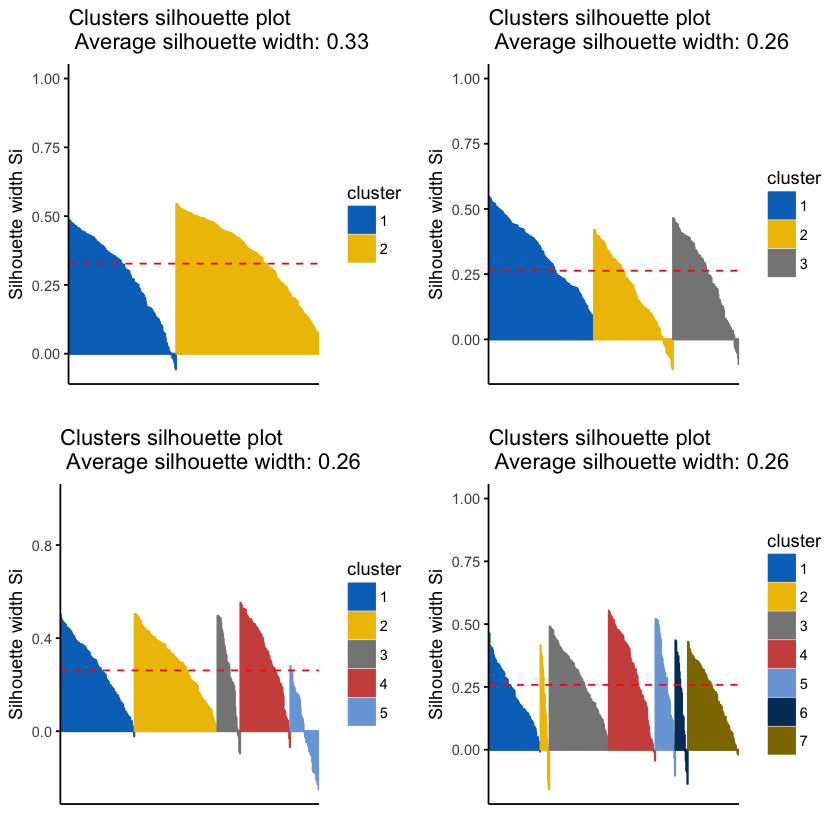

In [122]:
plot_grid(km2_plot, km3_plot, km5_plot, km7_plot)

Looking at the above plots, we can see that the Average silhouette width for K-means with 2 clusters is 0.33, which is the best of all the models. This suggests that in terms of the connectedness measure we can say that using K-means with 2 clusters yields the best clustering results for this dataset.

Next, we calculate the dunn index. The function `cluster.stats()` from fpc package can be used to compute the Dunn index and many other indices.

In [123]:
# calculate the cluster stats for k-means models
km2_stats <- cluster.stats(dist(clt), km2$cluster)
km3_stats <- cluster.stats(dist(clt), km3$cluster)
km5_stats <- cluster.stats(dist(clt), km5$cluster)
km7_stats <- cluster.stats(dist(clt), km7$cluster)

# print dunn index
paste("k-means with 2 clusters, Dunn Index: ", round(km2_stats$dunn, 3))
paste("k-means with 3 clusters, Dunn Index: ", round(km3_stats$dunn, 3))
paste("k-means with 5 clusters, Dunn Index: ", round(km5_stats$dunn, 3))
paste("k-means with 7 clusters, Dunn Index: ", round(km7_stats$dunn, 3))

[1] "k-means with 2 clusters, Dunn Index:  0.029"

[1] "k-means with 3 clusters, Dunn Index:  0.027"

[1] "k-means with 5 clusters, Dunn Index:  0.031"

[1] "k-means with 7 clusters, Dunn Index:  0.04"

### Internal measures of Hierarchical clustering

In [133]:
clt <- comp

# K-means models
hc1 <- eclust(clt, "hclust", k=2, hc_method="complete", graph = F)
hc2 <- eclust(clt, "hclust", k=2, hc_method="ward.D2", graph = F)
hc3 <- eclust(clt, "hclust", k=2, hc_method="average", graph = F)
hc4 <- eclust(clt, "hclust", k=2, hc_method="centroid", graph = F)

In [150]:
hc1_plot <- fviz_silhouette(hc1, palette="jco", ggtheme = theme_classic()) + ggtitle("Linkage Method = complete")

  cluster size ave.sil.width
1       1  243          0.25
2       2  197          0.35


In [151]:
hc2_plot <- fviz_silhouette(hc2, palette="jco", ggtheme = theme_classic()) + ggtitle("Linkage Method = ward.D2")

  cluster size ave.sil.width
1       1  125          0.34
2       2  315          0.34


In [152]:
hc3_plot <- fviz_silhouette(hc3, palette="jco", ggtheme = theme_classic()) + ggtitle("Linkage Method = average")

  cluster size ave.sil.width
1       1  429          0.45
2       2   11          0.40


In [153]:
hc4_plot <- fviz_silhouette(hc4, palette="jco", ggtheme = theme_classic()) + ggtitle("Linkage Method = centroid")

  cluster size ave.sil.width
1       1  438          0.58
2       2    2          0.86


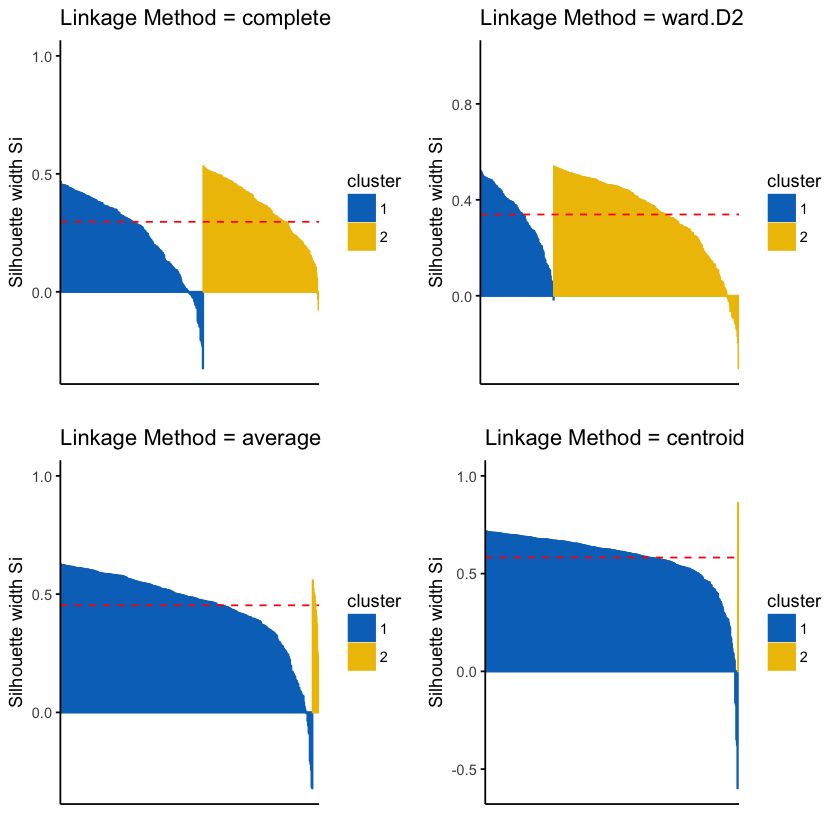

In [154]:
plot_grid(hc1_plot, hc2_plot, hc3_plot, hc4_plot)

Based on the above plots, the linkage methods `complete` and `ward.D2` appear to be clustering the observations better than the other two linkage methods. It is possible to visually compare the dendograms generated by these linkage methods to see how they compare against each other. 

We can compare two dendrograms using the `dendextend` R package. The `dendextend` package provides `tanglegram()` for visual comparison of two dendrograms.

In [155]:
dend1 <- as.dendrogram(hrc.link)
dend2 <- as.dendrogram(hrc.link.ward2)

# Create a list to hold dendrograms
dend_list <- dendlist(dend1, dend2)

To visually compare two dendrograms, we will use the `tanglegram()` function which plots two dendrograms, side by side, with their labels connected by lines. The quality of the alignment of the two trees can be measured using the function `entanglement()`. Entanglement is a measure between 1 (full entanglement) and 0 (no entanglement). A lower entanglement coefficient corresponds to a good alignment.

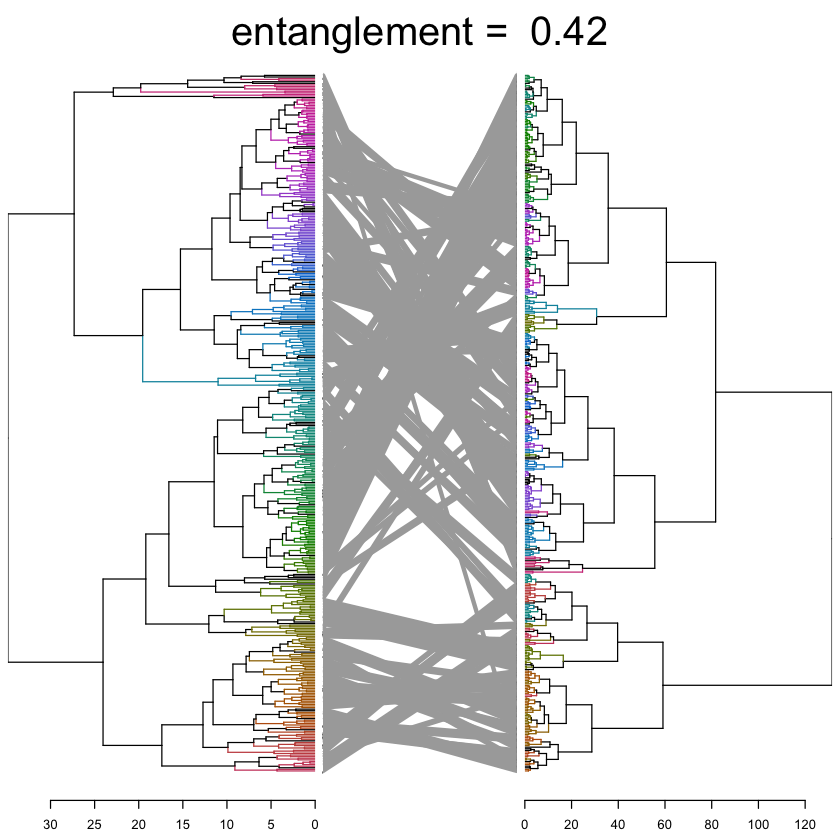

In [156]:
# Draw a tanglegram between linkage methods "complete" and "ward.D2"
tanglegram(dend1, dend2,
          highlight_distinct_edges = F, # Turn-off dashed lines
          common_subtrees_color_lines = F,
          common_subtrees_color_branches = T,
          margin_inner=0.5,
          edge.lwd=1,
          cex.main=0.25,
          main = paste("entanglement = ", round(entanglement(dend_list), 2)))

The left dendrogram corresponds to `complete linkage` and the right dendrogram corresponds to `ward.D2 linkage`. What this plot is showing is how each linkage method is clustering individual observations. Lower values of entanglement mean that both linkage methods are well aligned. In our case, an entanglement value of 0.42 suggests that both linkage methods are resonably similar in the way they are forming sub-groups. 

Referring back to the silhoutte plot we calculated above, we can see that the average silhouette width for `complete linkage` is (0.25 + 0.35)/2 = 0.30, whereas, the average silhoutte width for `ward.D2 linkage` is (0.34 + 0.34)/2 = 0.34. Just by looking at the average silhoutte width, we could have picked `ward.D2 linkage` as the best model, but having explored its dendrogram and visually comparing it side-by-side with `complete linkage`, we find that both could work for this dataset. R provides a package `clValid` to help choose between clustering models, which we explore in the next section.

### Choosing the best clustering model

The `clValid` package compares clustering algorithms using `internal measures` like connectivity, silhouette coefficient and the Dunn Index and outputs the optimal model for a given dataset. We first compare the linkage methods `complete` vs `ward.D2` by varying the number of clusters. Secondly, we extend this comparison to compare Hierarchical clustering vs K-means clustering using `internal measures`.

In [166]:
completeInternalMeasures <- clValid(clt, nClust = 2:7, clMethods = "hierarchical",
        method = "complete", validation = "internal")
summary(completeInternalMeasures)


Clustering Methods:
 hierarchical 

Cluster sizes:
 2 3 4 5 6 7 

Validation Measures:
                                 2       3       4       5       6       7
                                                                          
hierarchical Connectivity  51.1746 65.6341 82.4206 82.9540 86.2163 90.1853
             Dunn           0.0348  0.0395  0.0415  0.0481  0.0486  0.0495
             Silhouette     0.2967  0.2840  0.2799  0.2740  0.2721  0.2805

Optimal Scores:

             Score   Method       Clusters
Connectivity 51.1746 hierarchical 2       
Dunn          0.0495 hierarchical 7       
Silhouette    0.2967 hierarchical 2       



In [168]:
wardInternalMeasures <- clValid(clt, nClust = 2:7, clMethods = "hierarchical",
        method = "ward", validation = "internal")
summary(wardInternalMeasures)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



Clustering Methods:
 hierarchical 

Cluster sizes:
 2 3 4 5 6 7 

Validation Measures:
                                  2        3        4        5        6        7
                                                                                
hierarchical Connectivity   32.4869  49.5115  98.3778 103.2897 103.3897 109.0040
             Dunn            0.0392   0.0430   0.0409   0.0409   0.0449   0.0522
             Silhouette      0.2816   0.2754   0.2092   0.2125   0.2358   0.2390

Optimal Scores:

             Score   Method       Clusters
Connectivity 32.4869 hierarchical 2       
Dunn          0.0522 hierarchical 7       
Silhouette    0.2816 hierarchical 2       



From the above summary we can see that there isn't much difference between choosing `complete linkage` vs `ward.D2 linkage` methods for our dataset.

### Compare Hierarchical vs Kmeans using internal measures

In [169]:
# Compare clustering algorithms
clmethods <- c("hierarchical", "kmeans")
internalMeasures <- clValid(clt, nClust=2:7, clMethods = clmethods,
                           method = "complete", validation = "internal")
summary(internalMeasures)


Clustering Methods:
 hierarchical kmeans 

Cluster sizes:
 2 3 4 5 6 7 

Validation Measures:
                                  2        3        4        5        6        7
                                                                                
hierarchical Connectivity   51.1746  65.6341  82.4206  82.9540  86.2163  90.1853
             Dunn            0.0348   0.0395   0.0415   0.0481   0.0486   0.0495
             Silhouette      0.2967   0.2840   0.2799   0.2740   0.2721   0.2805
kmeans       Connectivity   59.4246 103.2179 118.9754 150.1329 154.5337 159.0056
             Dunn            0.0290   0.0415   0.0276   0.0403   0.0419   0.0405
             Silhouette      0.3273   0.2642   0.2762   0.2626   0.2537   0.2582

Optimal Scores:

             Score   Method       Clusters
Connectivity 51.1746 hierarchical 2       
Dunn          0.0495 hierarchical 7       
Silhouette    0.3273 kmeans       2       



Going by internal measures, the optimal internal measures are as follows:
   - Using `Connectivity` measure, Hierarchical clustering with 2 clusters performs best.
   - Using `Dunn` measure, Hierarchical clustering with 7 clusters performs best.
   - Using `Silhouette`, K-means clustering with 2 clusters performs best.

### Choosing optimal number of clusters
There are other methods we can use to choose the optimal number of clusters. Here we will explore the `Elbow method` and `Average Silhouette Method`.

We begin by comparing KMeans Clustering vs Hierachical clustering based on the optimal number of clusters selected based on scree plot generated using both Elbow method and Average Silhouette Method.

>###  Method A: Elbow Method

>The basic idea is to define clusters such that the total intra-cluster variation (known as total within-cluster variation or total within-cluster sum of square) is minimized: We use a built in fviz_nbclust function from  factorextra library


In [176]:
a = fviz_nbclust(comp, kmeans, method = "wss")+geom_vline(xintercept = 2, linetype = 2)+ 
    geom_text(label = " Optimal # of Kmeans Clusters by Elbow Method", colour = "red", 
              x = 7, y = 25000, size = 4) 

In [177]:
b = fviz_nbclust(comp, hcut, method = "wss")+geom_vline(xintercept = 2, linetype = 2)+
    geom_text(label = "Optimal # of Hierarchical Clusters by Elbow", colour = "blue", 
              x = 7, y = 25000, size = 4) 

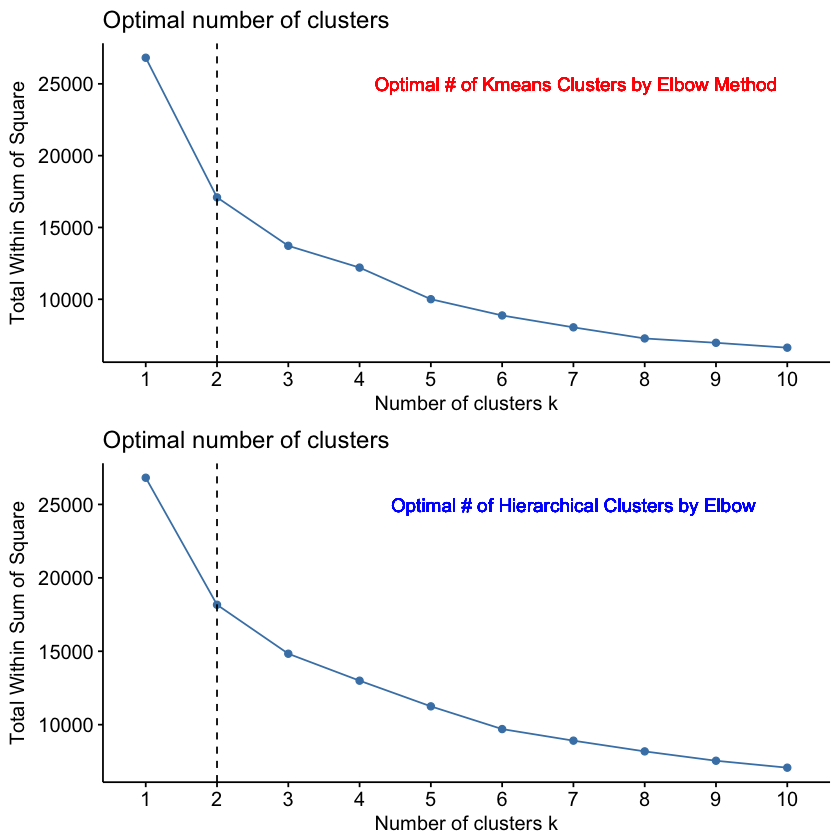

In [178]:
library(gtable)
library(grid)

g2 <- ggplotGrob(a)
g3 <- ggplotGrob(b)
g <- rbind(g2, g3, size = "first")
g$widths <- unit.pmax(g2$widths, g3$widths)
grid.draw(g)

Reviewing the elbow scree plots above for both Hierachical clustering and Kmeans clustering, we need 2 to be the optimal number of clusters based on Total within sum of squares. Within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. We note that beyond two clusters, there is no significant drop in the Total within sum of squares. As always you always want to get the smallest number of clusters to minimize over fitting.

>###  Method B: Average Silhouette Method

>Average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. 

In [40]:
c = fviz_nbclust(comp, kmeans, method = "silhouette")+geom_vline(xintercept = 2, linetype = 2)+ 
            geom_text(label = "Optimal # of Kmeans Clusters by Average Silhouette Method",
                      colour = "red", x = 7, y = 0.21, size = 4) 

In [41]:
d = fviz_nbclust(comp, hcut, method = "silhouette")+geom_vline(xintercept = 2, linetype = 2)+
            geom_text(label = "Optimal # of Hierarchical Clusters by Average Silhouette Method", 
              colour = "blue", x = 7, y = 0.21, size = 4) 

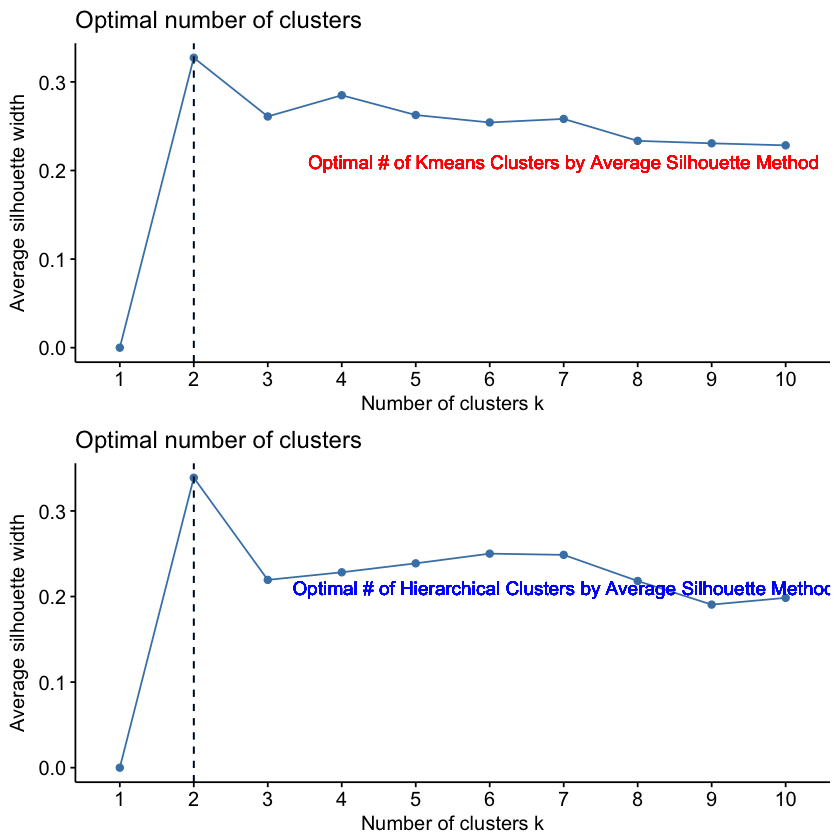

In [42]:
g2 <- ggplotGrob(c)
g3 <- ggplotGrob(d)
g <- rbind(g2, g3, size = "first")
g$widths <- unit.pmax(g2$widths, g3$widths)
grid.draw(g)

## External Cluster validation
As we have discovered that using K-means with 2 clusters and Hierarchical clustering with 2 clusters are optimal for our dataset, we can measure these clustering results with the true structure of the data.

We can use the function `cluster.stats()` . Let's start by computing the cross-tabulation between k-means clusters and the reference `data.class` variable.

In [170]:
# Cross-tabulation for k-means
table(data.class, km2$cluster)

          
data.class   1   2
         0   8 111
         1 181 140

In [173]:
# Cross-tabulation for Hierarchical Clustering
table(data.class, hc1$cluster)

          
data.class   1   2
         0  22  97
         1 221 100

- A large number of below average schools(represented by data.class = 0) are classified into cluster 2.
- More number of above average schools(represented by data.class = 1) are classified into cluster 1.

It is possible to quantify the *agreement* between data.class and k-means clustering results using the **corrected Rand index** .

In [174]:
# Compute external cluster stats for k-means
km2_ext_stats <- suppressWarnings(cluster.stats(d = dist(clt), data.class, km2$cluster))

# Corrected rand index
paste("Corrected Rand Index for K-means: ", km2_ext_stats$corrected.rand)

[1] "Corrected Rand Index for K-means:  0.101765716166922"

In [175]:
# Compute external cluster stats for HC
hc1_ext_stats <- suppressWarnings(cluster.stats(d = dist(clt), data.class, hc1$cluster))

# Corrected rand index
paste("Corrected Rand Index for Hierarchical Clustering: ", hc1_ext_stats$corrected.rand)

[1] "Corrected Rand Index for Hierarchical Clustering:  0.195144527747262"

The `Corrected Rand Index` provides a measure for assessing the similarity between two partitions, adjusted for chance. Its range is -1 (no agreement) to 1 (perfect agreement). In our case, for K-means the agreement between our class label and the clustering result is **0.101** and for Hierarchical clustering the agreement is **0.195**. This means that in terms of external cluster validation we can choose Hierarchical clustering method over K-means.

<div class="alert alert-info"><h1>

<font color=black> Summarize the Ramifications</font>
</h1></div>


### Comparing Clustering result vs Actual class labels.

In order to compare the performance of our clustering algorithms vs our known class labels, We are going to add our cluster results for our K-means and Hierarchical algorithm to our original dataset which has our class labels. The following code performs the merge operations to create the final dataset that we will use for our model performance evaluation.

In [179]:
#kmeans Clusters
clust <- names(sort(table(k2$clust)))
#hierichical Cluster
hclust<-names(sort(table(H$cluster)))

In [180]:
#K-Means data
SummaryData <-data.frame()
TEMP<-c()
for(i in 1:length(k2$size)){
    TEMP$School <- c(row.names(data[k2$clust==clust[i],]))
    TEMP$Cluster <- i
    TEMP$Algo<-"Kmeans"
    grouped<- cbind(TEMP$School,TEMP$Cluster,TEMP$Algo)   
    SummaryData<-rbind(SummaryData, grouped)
}
names(SummaryData)<-c('School', 'Cluster', 'Algo')

y = data.frame(table(SummaryData$Cluster))
SummaryData$Majority.Cluster<-y[which.max(y$Freq),]$Var1# deterimine the majority cluster and add to summary dataframe
SummaryData$InMajorityCluster<-SummaryData$Cluster==SummaryData$Majority.Cluster #TRUE is school is in majority cluster
#head(SummaryData, 2)
#tail(SummaryData,2)

#pulling in the original class labels
data.class.frame<-data.frame(data.class)
data.class.frame$School<-row.names(scaled_data.new)
names(data.class.frame)<-c("Class","School")

x = data.frame(table(data.class.frame$Class)) # summary of the original class labels
data.class.frame$Majority.Class<-x[which.max(x$Freq),]$Var1# deterimine the majority class and add
data.class.frame$InMajorityClass<-data.class.frame$Class==data.class.frame$Majority.Class #TRUE is school is in majority cluster
#head(data.class.frame, 2)
#tail(data.class.frame,2)

mergedData <- merge(SummaryData,data.class.frame,by="School") # merge dataframe with class lables to that with cluster labels

#head(mergedData)
mergedData$CorrectCluster<-mergedData$InMajorityCluster==mergedData$InMajorityClass # In both majority class and cluster

Temporary.data.new<-data.new
Temporary.data.new$School<-row.names(data.new)

mergedData1 <- merge(Temporary.data.new,mergedData,by="School") # merge dataframe with class lables to that with cluster labels

print('################################################################################################')
print("#                                           Kmeans Data                                        #")
print('################################################################################################')
head(mergedData)
#summary(mergedData)
print('################################################################################################')
print("#                                      Hierarchical Data                                        #")
print('################################################################################################')

#Hierarchical data
SummaryData2 <-data.frame()
TEMP2<-c()
for(i in 1:length(H$size)){
    TEMP2$School <- c(row.names(data[H$cluster==hclust[i],]))
    TEMP2$Cluster <- i
    TEMP2$Algo<-"Hierarchical"
    grouped<- cbind(TEMP2$School,TEMP2$Cluster,TEMP2$Algo)   
    SummaryData2<-rbind(SummaryData2, grouped)
}

names(SummaryData2)<-c('School', 'Cluster', 'Algo')

y = data.frame(table(SummaryData2$Cluster))
SummaryData2$Majority.Cluster<-y[which.max(y$Freq),]$Var1# deterimine the majority cluster and add to summary dataframe
SummaryData2$InMajorityCluster<-SummaryData2$Cluster==SummaryData2$Majority.Cluster #TRUE is school is in majority cluster
#head(SummaryData2, 2)
#tail(SummaryData2,2)    
SummaryData2<- merge(SummaryData2,data.class.frame,by="School") # merge dataframe with class lables to that with cluster labels

SummaryData2$CorrectCluster<-SummaryData2$InMajorityCluster==SummaryData2$InMajorityClass # In both majority class and cluster

head(SummaryData2)
#summary(SummaryData2)
#merge Hierachical data to the original school data.
mergedData2 <- merge(Temporary.data.new,SummaryData2,by="School")
#merged Dataframes with both hierachical data and Kmeans Data
mergedDataFinal<-rbind(mergedData1, mergedData2)

[1] "################################################################################################"
[1] "#                                           Kmeans Data                                        #"
[1] "################################################################################################"


School Cluster Algo   Majority.Cluster InMajorityCluster Class Majority.Class InMajorityClass CorrectCluster
1 100307 1       Kmeans 2                FALSE             1     1               TRUE           FALSE         
2 100326 2       Kmeans 2                 TRUE             0     1              FALSE           FALSE         
3 100334 2       Kmeans 2                 TRUE             0     1              FALSE           FALSE         
4 100348 2       Kmeans 2                 TRUE             1     1               TRUE            TRUE         
5 110304 1       Kmeans 2                FALSE             1     1               TRUE           FALSE         
6 110322 1       Kmeans 2                FALSE             1     1               TRUE           FALSE

[1] "################################################################################################"
[1] "#                                      Hierarchical Data                                        #"
[1] "################################################################################################"


School Cluster Algo         Majority.Cluster InMajorityCluster Class Majority.Class InMajorityClass CorrectCluster
1 100307 1       Hierarchical 2                FALSE             1     1               TRUE           FALSE         
2 100326 2       Hierarchical 2                 TRUE             0     1              FALSE           FALSE         
3 100334 2       Hierarchical 2                 TRUE             0     1              FALSE           FALSE         
4 100348 2       Hierarchical 2                 TRUE             1     1               TRUE            TRUE         
5 110304 2       Hierarchical 2                 TRUE             1     1               TRUE            TRUE         
6 110322 1       Hierarchical 2                FALSE             1     1               TRUE           FALSE

> ### Clustering data Summary

> In the code block above, we map schools to the clusters assigned by both Kmeans clustering and hierarchical clustering. Since cluster labels could change with each run we create a new Binary label, InMajorityCluster which Checks if a school is in the majority cluster. We also create a similar label InMajorityClass which checks if a school is in the majority class from our class labels. To gauge how well our algorithms are working we create another flag, CorrectCluster which checks if a school has a similar label for both InMajorityClass and InMajorityCluster.  We chose to use this method to evaluate our clustering in comparison to our actual class label since our classes are imbalance with 119 schools labeled as 0 {Schools with graduation rate below NC High School’s State Average 4-year graduation rate} and 321 schools labeled as 1 (Schools with graduation rates above the State's Average)

> Below we visually analyze our results.

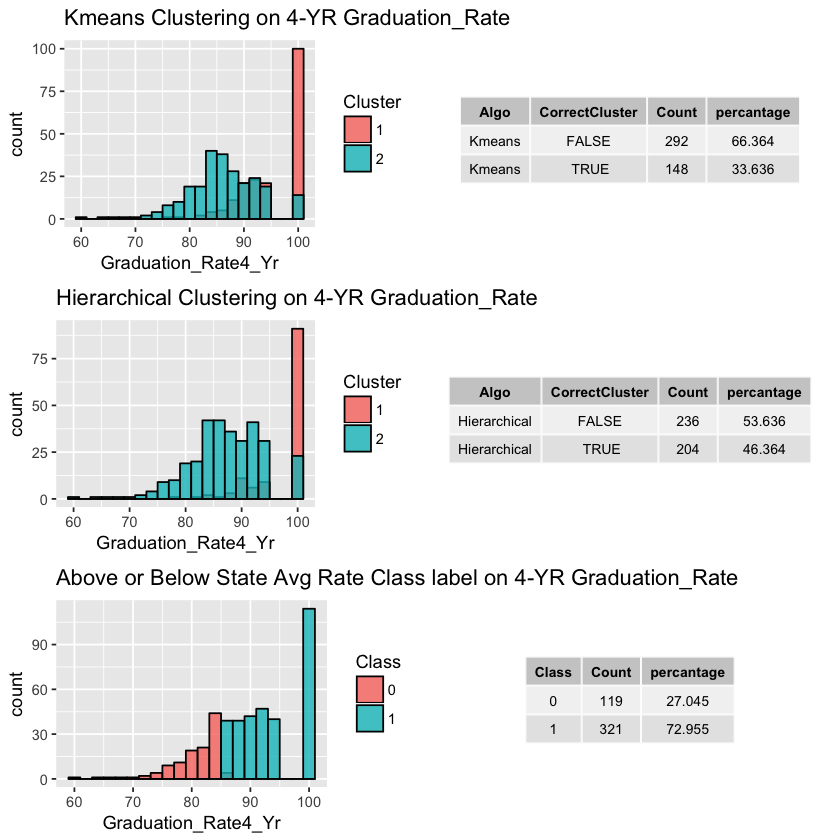

In [182]:
theme_set(theme_gray())

mergedData2$Class<-as.factor(mergedData2$Class)
# histogram 4 year graduation rate vs Kmeans Clustering
KCL1 = ggplot(mergedData1, aes(x=Graduation_Rate4_Yr   , fill=Cluster)) +
    geom_histogram(binwidth=2,color="black", alpha=.8, position="identity") + ggtitle("Kmeans Clustering on 4-YR Graduation_Rate")

# histogram of  4 year graduation rate vs Hierarchical
HCL1 = ggplot(mergedData2, aes(x=Graduation_Rate4_Yr   , fill=Cluster)) +
    geom_histogram(binwidth=2,color="black", alpha=.8, position="identity")+ ggtitle("Hierarchical Clustering on 4-YR Graduation_Rate")

# histogram of 4 year graduation rate vs class label
ACLS = ggplot(mergedData2, aes(x=Graduation_Rate4_Yr   , fill=Class)) +
    geom_histogram(binwidth=2,color="black", alpha=.8, position="identity")+ ggtitle("Above or Below State Avg Rate Class label on 4-YR Graduation_Rate")

#Creating Summary Tables to accompany the plot
SummaryTable<-mergedDataFinal%>%
group_by(Algo,CorrectCluster)%>%
summarise('Count' = n(),
         'percantage' = round(100*(Count/440),3))

#Creating Summary on clustering accuracy
SummaryTable2<-mergedDataFinal%>%
group_by(Algo,Class,Cluster, CorrectCluster)%>%
summarise('Count' = n(),
         'percantage' = round(100*(Count/440),3))

#kmeans Summary Table
KCT<-SummaryTable[which(SummaryTable$Algo=="Kmeans"),]


#Hierachical Summary Table
HCT<-SummaryTable[which(SummaryTable$Algo=="Hierarchical"),]

#actual above and below class labels summary table
CLT<-mergedDataFinal%>%
group_by(Class)%>%
summarise('Count' = n()/2,
         'percantage' = round(100*(Count/440),3))


#library(cowplot)
#plot_grid(KCL1,KCT, HCL1, HCT, ACLS, CLT,  nrow = 3 )#, align = "v")
library(gridExtra)
tt <- gridExtra::ttheme_default(
    core = list(fg_params=list(cex = 0.7)),
    colhead = list(fg_params=list(cex = 0.7)),
    rowhead = list(fg_params=list(cex = 0.7)))
tbl1 <- tableGrob(KCT, rows=NULL, theme=tt)
tbl2 <- tableGrob(HCT, rows=NULL, theme=tt)
tbl3 <- tableGrob(CLT, rows=NULL, theme=tt)

grid.arrange(KCL1, tbl1, HCL1, tbl2, ACLS, tbl3,nrow=3, ncol =2)

In [183]:
SummaryTable2

Algo         Class Cluster CorrectCluster Count percantage
1 Hierarchical 0     1        TRUE            4    0.909    
2 Hierarchical 0     2       FALSE          115   26.136    
3 Hierarchical 1     1       FALSE          121   27.500    
4 Hierarchical 1     2        TRUE          200   45.455    
5 Kmeans       0     1        TRUE            8    1.818    
6 Kmeans       0     2       FALSE          111   25.227    
7 Kmeans       1     1       FALSE          181   41.136    
8 Kmeans       1     2        TRUE          140   31.818

For this lab we chose to use 'Above_NC_AVG_Graduation_Rate4_Yr' as our class label.  'Above_NC_AVG_Graduation_Rate4_Yr' is a categorical feature by comparing High school 4-year graduation Rate 'Graduation_Rate4_Yr',  to North Carolina's state average 4-year high school graduation rate. If a school's Graduation_Rate4_Yr is above 85.4% (NC State Average High School graduation rate), the school is binned as 1 else 0. 

When pitting K-means, and Hierarchical Clustering against one another, Hierarchical Clustering is the winner in clustering our North Carolina High School Education data. This is based on clustering accuracy. 

Hierachical Clustering has a clustering accruacy of 46% compared to the 33% for Kmeans clustering. 

It is worth noting from the clustering results that both Kmeans and Hierarchical Clustering struggle to classify schools which have 100% graduation rate. Schools with 100% graduation could be regarded as outliers compared to the rest of the schools in North Carolina. 

Kmeans struggles the most to cluster these top performing schools since it uses centroids as centers to the true clusters. If we chose the centroids to be the centers of the true clusters (the optimal 'representative' configuration), the value of the loss function would be very high. Loss function is the sum of squared distances from each point to its assigned cluster centroid.

K-means would reduce the loss function by choosing one of the High Performing schools as one of centroids and placing the other centroid somewhere in the middle of the remaining data. This configuration is clearly not representative of the underlying distribution, but a pathological situation caused by the presence outliers 'high performing school'.

With accuracy scores below 50%, these models did not meet our desired goals. However, through this analysis process we have gained insights into how to improve cluster scores through feature creation, principal components analysis, parameter adjustments, and the selection of the proper clustering method for different types of data. In the future, we can use this knowledge to build models which will more efficiently handle unsupervised learning tasks.

<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>

<font color=black>Deployment</font>
</h1></div>

Even though we were not able to correctly classify schools into clusters which correlate with above/below average graduation rates, the model can still be used to separate schools into two separate groups based on our pca. Segmenting schools based only on State data could provide a non-biased technical way to describe each school’s relationship with each other. District school officials can use the cluster group to create Professional Learning Communities (PLC) which could be used to allocate resources and development to targeted schools that have commonality which could be useful in terms of saving resources and staff developmental needs. Principals of each group could be added to a cluster group which forms a Principal network group that could forge new relationships and collaborations for school improvement. These network groups could focus on results and data to help drive growth areas and student achievement. 

To keep the model up to date, a yearly update of all variables from individual schools will need to be inputted to the model to compare with the models' predictions.

Other data that we believe would be helpful to collect include; student demographics, socioeconomic status of student families, and, after the program has been in action for a few years, feedback from the schools that participate in our proposed deployment.

<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>

<font color=black>Exceptional Work</font>
</h1></div>

### 1. Geospatial representation of clusters
We thought it would be interesting to visualize the clusters geographically. Below we utilize `ggmap` to plot the data.

In [69]:


geoData <- read.csv("https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/Other%20Projects/Raw%20Datasets/All_Data_By_School_Final.csv") 
geoKeep <- c("unit_code", "street_ad", "scity_ad", "state_ad", "szip_ad") 
geoData <- geoData[geoKeep]

c1 <- row.names(data[k2$clust==clust[1],]) 
c2 <- row.names(data[k2$clust==clust[2],])
geoDataC1 <- geoData[geoData$unit_code %in% c1,]
geoDataC2 <- geoData[geoData$unit_code %in% c2,]

geoDataHighSchool<-rbind(geoDataC1, geoDataC2)
geoDataHighSchool$Address <- paste(geoDataHighSchool$street_ad, ", ", 
                                   geoDataHighSchool$scity_ad, " ",
                                   geoDataHighSchool$state_ad)
geoDataHighSchool$lon <-NA
geoDataHighSchool$lat <- NA


In [70]:
pacman::p_load(ggmap)

also installing the dependencies ‘maps’, ‘proto’, ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘mapproj’, ‘jpeg’, ‘geosphere’




The downloaded binary packages are in
	/var/folders/s_/d5qfzls10sz1z696lmcpvtfw0000gn/T//Rtmp4gzBS7/downloaded_packages



ggmap installed


In [73]:
for (i in 1:nrow(geoDataHighSchool)){
    print(i)
    if(is.na(geoDataHighSchool$lon[i])==TRUE ){
        Sys.sleep(1)
        temp1<-((geocode(geoDataHighSchool$Address[i],force=TRUE, override_limit=TRUE)))
        geoDataHighSchool$lon[i]<-temp1$lon
        geoDataHighSchool$lat[i]<-temp1$lat 
        }
}
head(geoDataHighSchool)

[1] 1


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=50%20College%20Road%20NE%20,%20%20Bolivia%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "50 College Road NE ,  Bolivia   NC"”

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=890%20Clarks%20Chapel%20Road%20,%20%20Weaverville%20%20%20NC&sensor=false


[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1531%20Trinity%20Church%20Rd%20,%20%20Concord%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "1531 Trinity Church Rd ,  Concord   NC"”

[1] 17


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2857%20Hickory%20Boulevard%20,%20%20Hudson%20%20%20NC&sensor=false


[1] 18
[1] 19


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=103%20US%20158%20W%20,%20%20Camden%20%20%20NC&sensor=false


[1] 20
[1] 21
[1] 22


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1%20Cougar%20Lane%20,%20%20Newport%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "1 Cougar Lane ,  Newport   NC"”

[1] 23


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=4700%20Country%20Club%20Road%20,%20%20Morehead%20City%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "4700 Country Club Road ,  Morehead City   NC"”

[1] 24
[1] 25


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2550%20Hwy%2070%20SE%20,%20%20Hickory%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "2550 Hwy 70 SE ,  Hickory   NC"”

[1] 26
[1] 27
[1] 28


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=301%20West%2018th%20St%20,%20%20Newton%20%20%20NC&sensor=false


[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1801%20Fayetteville%20Street,%20NCCU-Robinson%20Science%20Building%20,%20%20Durham%20%20%20NC&sensor=false


[1] 52
[1] 53


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1637%20Lawson%20Street%20,%20%20Durham%20%20%20NC&sensor=false


[1] 54


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2009%20West%20Wilson%20St%20,%20%20Tarboro%20%20%20NC&sensor=false


[1] 55
[1] 56
[1] 57
[1] 58


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=3750%20Transou%20Road%20,%20%20Pfafftown%20%20%20NC&sensor=false


[1] 59
[1] 60


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1735%20Lewisville-Clemmons%20,%20%20Clemmons%20%20%20NC&sensor=false


[1] 61


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=8150%20NC%20Highway%2056%20,%20%20Louisburg%20%20%20NC&sensor=false


[1] 62


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gaston%20College%20Lena%20Sue%20Beam%20Bldg,%20201%20Hwy%20321%20South%20,%20%20Dallas%20%20%20NC&sensor=false


[1] 63


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=906%20South%20Point%20Road%20,%20%20Belmont%20%20%20NC&sensor=false


[1] 64


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1552%20South%20Campus%20Dr%20,%20%20Creedmoor%20%20%20NC&sensor=false


[1] 65
[1] 66
[1] 67


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=610%20Gorrell%20Street%20,%20%20Greensboro%20%20%20NC&sensor=false


[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=120%20Alumni%20Way%20,%20%20Flat%20Rock%20%20%20NC&sensor=false


[1] 89
[1] 90


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=120%20Schoolhouse%20Rd%20,%20%20Ocracoke%20%20%20NC&sensor=false


[1] 91
[1] 92
[1] 93
[1] 94


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=299%20Old%20Mountain%20Rd%20,%20%20Statesville%20%20%20NC&sensor=false


[1] 95
[1] 96


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=404%20College%20Drive%20,%20%20Sylva%20%20%20NC&sensor=false


[1] 97


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=600%20S%20Fayetteville%20St%20,%20%20Clayton%20%20%20NC&sensor=false


[1] 98


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1892%20Polenta%20Rd%20,%20%20Clayton%20%20%20NC&sensor=false


[1] 99


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=6875%20Applewhite%20Rd%20,%20%20Wendell%20%20%20NC&sensor=false


[1] 100
[1] 101
[1] 102
[1] 103


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1105%20Kelly%20Drive%20,%20%20Sanford%20%20%20NC&sensor=false


[1] 104
[1] 105


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=6471%20Hwy%2073%20,%20%20Denver%20%20%20NC&sensor=false


[1] 106
[1] 107
[1] 108
[1] 109


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=800%20Bailey%20Street%20,%20%20Mars%20Hill%20%20%20NC&sensor=false


[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=8900%20Park%20Rd%20,%20%20Charlotte%20%20%20NC&sensor=false


[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=630%20MacMillan%20Avenue%20,%20%20Wilmington%20%20%20NC&sensor=false


[1] 131
[1] 132
[1] 133


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=4500%20Blue%20Clay%20Rd,%20WECHS%20Bldg.ND122%20,%20%20Castle%20Hayne%20%20%20NC&sensor=false


[1] 134


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1125%20New%20Grady%20Brown%20Sch%20Rd%20,%20%20Hillsborough%20%20%20NC&sensor=false


[1] 135


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=500%20Orange%20High%20Rd%20,%20%20Hillsborough%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "500 Orange High Rd ,  Hillsborough   NC"”

[1] 136
[1] 137
[1] 138
[1] 139
[1] 140


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=245%20St.%20Johns%20Church%20Road%20,%20%20Hampstead%20%20%20NC&sensor=false


[1] 141
[1] 142
[1] 143
[1] 144
[1] 145
[1] 146
[1] 147
[1] 148
[1] 149
[1] 150
[1] 151
[1] 152
[1] 153
[1] 154
[1] 155
[1] 156
[1] 157
[1] 158
[1] 159
[1] 160
[1] 161
[1] 162
[1] 163
[1] 164
[1] 165
[1] 166
[1] 167
[1] 168
[1] 169
[1] 170
[1] 171
[1] 172
[1] 173
[1] 174


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=8410%20Pride%20Way%20,%20%20Raleigh%20%20%20NC&sensor=false


[1] 175


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=123%20Middle%20Creek%20Park%20Avenue%20,%20%20Apex%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "123 Middle Creek Park Avenue ,  Apex   NC"”

[1] 176
[1] 177
[1] 178
[1] 179


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2901%20Holston%20Lane%20,%20%20Raleigh%20%20%20NC&sensor=false


[1] 180
[1] 181
[1] 182
[1] 183
[1] 184
[1] 185
[1] 186
[1] 187
[1] 188
[1] 189
[1] 190
[1] 191


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=280%20Cougar%20Drive%20BSL%20,%20%20Southport%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "280 Cougar Drive BSL ,  Southport   NC"”

[1] 192
[1] 193
[1] 194
[1] 195
[1] 196
[1] 197
[1] 198
[1] 199
[1] 200
[1] 201
[1] 202
[1] 203
[1] 204
[1] 205
[1] 206
[1] 207
[1] 208


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=600%20West%20Main%20Street%20,%20%20Maiden%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "600 West Main Street ,  Maiden   NC"”

[1] 209
[1] 210
[1] 211
[1] 212


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=910%20East%20Cardinal%20Street%20,%20%20Siler%20City%20%20%20NC&sensor=false


[1] 213
[1] 214


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=267%20Blue%20Eagle%20Circle%20,%20%20Murphy%20%20%20NC&sensor=false


[1] 215
[1] 216
[1] 217
[1] 218
[1] 219
[1] 220
[1] 221
[1] 222
[1] 223
[1] 224


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=413%20N%20Lee%20Street%20,%20%20Whiteville%20%20%20NC&sensor=false


[1] 225
[1] 226
[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235
[1] 236
[1] 237
[1] 238
[1] 239
[1] 240
[1] 241
[1] 242


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=14956%20South%20NC%20Hwy%20109%20,%20%20Denton%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "14956 South NC Hwy 109 ,  Denton   NC"”

[1] 243
[1] 244
[1] 245


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=410%20Unity%20Street%20,%20%20Thomasville%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "410 Unity Street ,  Thomasville   NC"”

[1] 246


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=394%20North%20NC%20Highway%20111%20,%20%20Beulaville%20%20%20NC&sensor=false


[1] 247


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1241%20NC%2024%20&%2050%20,%20%20Warsaw%20%20%20NC&sensor=false


[1] 248


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1388%20West%20NC%20403%20Highway%20,%20%20Mt.%20Olive%20%20%20NC&sensor=false


[1] 249


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=602%20High%20School%20Road%20,%20%20Teachey%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "602 High School Road ,  Teachey   NC"”

[1] 250


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=6806%20Garrett%20Road%20,%20%20Durham%20%20%20NC&sensor=false


[1] 251
[1] 252


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=117%20Tom%20Wilkinson%20Road%20,%20%20Durham%20%20%20NC&sensor=false


[1] 253
[1] 254


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=800%20Clayton%20Road%20,%20%20Durham%20%20%20NC&sensor=false


[1] 255


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=3727%20Fayetteville%20St%20,%20%20Durham%20%20%20NC&sensor=false


[1] 256
[1] 257
[1] 258
[1] 259


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=3545%20Carver%20School%20Road%20,%20%20Winston%20Salem%20%20%20NC&sensor=false


[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270
[1] 271
[1] 272
[1] 273
[1] 274


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1518%20Edgefield%20Avenue%20,%20%20Gastonia%20%20%20NC&sensor=false


[1] 275
[1] 276
[1] 277


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=301%20Sweetwater%20Road%20,%20%20Robbinsville%20%20%20NC&sensor=false


[1] 278
[1] 279
[1] 280


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=701%20N%20Crescent%20Dr%20,%20%20Creedmoor%20%20%20NC&sensor=false


[1] 281
[1] 282
[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289
[1] 290
[1] 291


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=100%20College%20Dr,%20600%20Building%20,%20%20Weldon%20%20%20NC&sensor=false


[1] 292
[1] 293
[1] 294


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2495%20Ray%20Road%20,%20%20Spring%20Lake%20%20%20NC&sensor=false


[1] 295


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=215%20Maynard%20Lake%20Road%20,%20%20Erwin%20%20%20NC&sensor=false


[1] 296
[1] 297
[1] 298


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=564%20Tuscola%20School%20Rd%20,%20%20Waynesville%20%20%20NC&sensor=false


[1] 299
[1] 300


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1500%20W%20First%20St%20,%20%20Ahoskie%20%20%20NC&sensor=false


[1] 301
[1] 302


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=505%20S%20Bethel%20Road%20,%20%20Raeford%20%20%20NC&sensor=false


[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=3355%20Old%20Hwy%2011%20South%20,%20%20Deep%20Run%20%20%20NC&sensor=false


[1] 320
[1] 321
[1] 322
[1] 323


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=213%20Windingstairs%20Rd%20,%20%20Topton%20%20%20NC&sensor=false


[1] 324
[1] 325


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=21077%20NC%20Hwy%20903%20,%20%20Robersonville%20%20%20NC&sensor=false


[1] 326


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1260%20Godwin%20Ave%20,%20%20Williamston%20%20%20NC&sensor=false


[1] 327
[1] 328


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=6200%20Starhaven%20Dr%20,%20%20Charlotte%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "6200 Starhaven Dr ,  Charlotte   NC"”

[1] 329
[1] 330
[1] 331
[1] 332
[1] 333


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=11201%20Old%20Statesville%20Rd%20,%20%20Huntersville%20%20%20NC&sensor=false


[1] 334
[1] 335
[1] 336
[1] 337


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=7600%20IBM%20Dr%20,%20%20Charlotte%20%20%20NC&sensor=false


[1] 338
[1] 339
[1] 340
[1] 341
[1] 342


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=147%20Warrior%20Drive%20,%20%20Mount%20Gilead%20%20%20NC&sensor=false


[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349
[1] 350
[1] 351
[1] 352
[1] 353
[1] 354
[1] 355
[1] 356
[1] 357
[1] 358
[1] 359
[1] 360
[1] 361
[1] 362


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1010%20Ridge%20Rd%20,%20%20Roxboro%20%20%20NC&sensor=false


[1] 363


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=7653%20NC%2011%20South%20,%20%20Ayden%20%20%20NC&sensor=false


[1] 364
[1] 365


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=600%20W%20Arlington%20Blvd%20,%20%20Greenville%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "600 W Arlington Blvd ,  Greenville   NC"”

[1] 366


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=5659%20NC%2011%20North%20,%20%20Bethel%20%20%20NC&sensor=false


[1] 367
[1] 368
[1] 369
[1] 370
[1] 371
[1] 372
[1] 373
[1] 374
[1] 375
[1] 376
[1] 377
[1] 378
[1] 379
[1] 380
[1] 381
[1] 382
[1] 383
[1] 384
[1] 385


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=180%20High%20School%20Rd%20,%20%20Reidsville%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "180 High School Rd ,  Reidsville   NC"”

[1] 386
[1] 387
[1] 388
[1] 389
[1] 390
[1] 391


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=8050%20NC%20801%20Hwy%20,%20%20Mount%20Ulla%20%20%20NC&sensor=false


[1] 392
[1] 393
[1] 394
[1] 395
[1] 396


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=245%20Lakewood%20School%20Rd%20,%20%20Salemburg%20%20%20NC&sensor=false


[1] 397


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=15274%20Spiveys%20Corner%20Highway%20,%20%20Newton%20Grove%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "15274 Spiveys Corner Highway ,  Newton Grove   NC"”

[1] 398


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1189%20Kader%20Merritt%20Road%20,%20%20Rose%20Hill%20%20%20NC&sensor=false


[1] 399
[1] 400


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1000%20West%20Church%20St%20,%20%20Laurinburg%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "1000 West Church St ,  Laurinburg   NC"”

[1] 401
[1] 402
[1] 403


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=40488%20S%20Stanly%20School%20Rd%20,%20%20Norwood%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "40488 S Stanly School Rd ,  Norwood   NC"”

[1] 404


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=306%20East%20Red%20Cross%20Road%20,%20%20Oakboro%20%20%20NC&sensor=false


[1] 405


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1350%20N%20Stokes%20Sch%20Rd%20,%20%20Danbury%20%20%20NC&sensor=false


[1] 406


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1100%20S%20Stokes%20High%20Drive%20,%20%20Walnut%20Cove%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "1100 S Stokes High Drive ,  Walnut Cove   NC"”

[1] 407
[1] 408
[1] 409
[1] 410


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=1415%20Fontana%20Road%20,%20%20Bryson%20City%20%20%20NC&sensor=false


[1] 411


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=749%20Pickens%20Hwy%20,%20%20Rosman%20%20%20NC&sensor=false


[1] 412
[1] 413
[1] 414
[1] 415
[1] 416
[1] 417
[1] 418
[1] 419
[1] 420
[1] 421
[1] 422
[1] 423
[1] 424
[1] 425


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=115%20West%20Middle%20Street%20,%20%20Creswell%20%20%20NC&sensor=false


[1] 426
[1] 427
[1] 428
[1] 429
[1] 430
[1] 431
[1] 432
[1] 433


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=13315%20Elkin%20Hwy%20268%20,%20%20Ronda%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "13315 Elkin Hwy 268 ,  Ronda   NC"”

[1] 434
[1] 435
[1] 436
[1] 437
[1] 438


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=4559%20Lamm%20Rd%20,%20%20Wilson%20%20%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "4559 Lamm Rd ,  Wilson   NC"”

[1] 439
[1] 440


unit_code street_ad              scity_ad       state_ad szip_ad Address                                    lon       lat     
117 100307    50 College Road NE     Bolivia        NC       28422   50 College Road NE ,  Bolivia   NC                NA       NA
135 110304    1 Rocket Drive         Asheville      NC       28803   1 Rocket Drive ,  Asheville   NC           -82.47724 35.54581
140 110322    340 Victoria Road      Asheville      NC       28801   340 Victoria Road ,  Asheville   NC        -82.55493 35.57404
141 110323    340 Victoria Road      Asheville      NC       28801   340 Victoria Road ,  Asheville   NC        -82.55493 35.57404
145 110336    99 Lake Eden Road      Black Mountain NC       28711   99 Lake Eden Road ,  Black Mountain   NC   -82.37341 35.61892
158 110380    890 Clarks Chapel Road Weaverville    NC       28787   890 Clarks Chapel Road ,  Weaverville   NC -82.55762 35.73980

In [75]:
write.csv(geoDataHighSchool, 'GeoData.csv')

In [184]:
geoDataNew <-read.csv('GeoData.csv') 
geoClusters <- merge(geoDataNew, mergedData, by.x = "unit_code", by.y = "School")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=35.7596,-79.0193&zoom=6&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
“Removed 21 rows containing missing values (geom_point).”

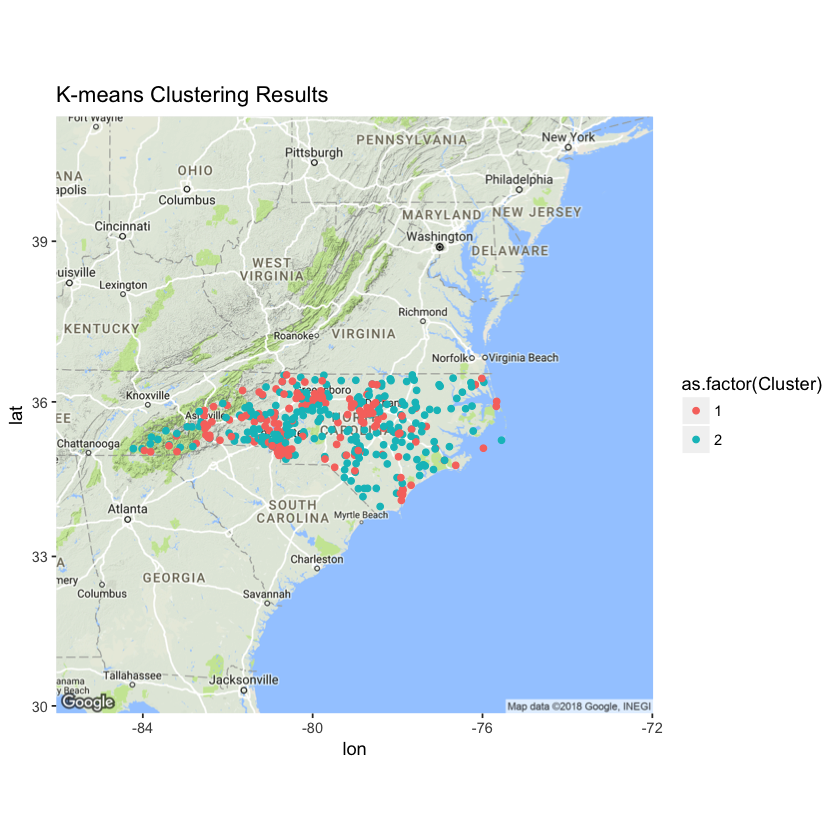

In [190]:
NCmap <- get_map(location = c(lon = -79.0193, lat = 35.7596), zoom = 6, maptype = 'terrain', scale=2) 
            ggmap(NCmap) + geom_point(data=geoClusters, aes(x=lon, y=lat, color=as.factor(Cluster)))+ ggtitle("K-means Clustering Results")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=35.7596,-79.0193&zoom=6&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
“Removed 21 rows containing missing values (geom_point).”

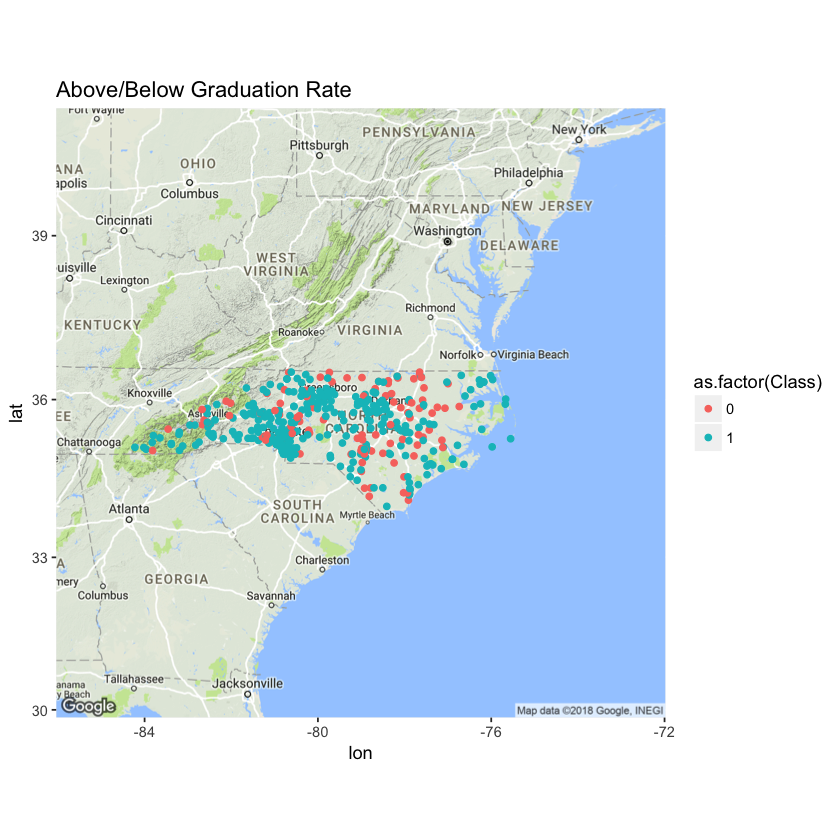

In [192]:
NCmap <- get_map(location = c(lon = -79.0193, lat = 35.7596), zoom = 6, maptype = 'terrain', scale=2) 
            ggmap(NCmap) + geom_point(data=geoClusters, aes(x=lon, y=lat, color=as.factor(Class))) + ggtitle("Above/Below Graduation Rate")

`Above_NC_AVG_Graduation_Rate4_Yr` is a categorical feature by comparing High school 4-year graduation Rate `Graduation_Rate4_Yr`, to North Carolina's state average 4-year high school graduation rate. If a school's Graduation_Rate4_Yr is above 85.4% (NC State Average High School graduation rate), the school is binned as 1 else 0.

### 2. Model Based Clustering

#### Ref: 
* http://www.sthda.com/english/articles/30-advanced-clustering/104-model-based-clustering-essentials/
* https://en.proft.me/2017/02/1/model-based-clustering-r/
* http://www.stat.cmu.edu/~brian/724/week14/mclust-old.pdf
* https://ieeexplore.ieee.org/abstract/document/8129683/

We chose to explore Model based clustering approach using the `Mclust` package in R. Unlike both hierarchical clustering and k-means clustering which use a heuristic approach to construct clusters and do not rely on a formal model, Model-based clustering assumes a data model approach. Without prior knowledge of the number of clusters or any other information about composition of the data, partitions in Model Based Clustering approach are determined by the expectation-maximization (EM) algorithm for maximum likelihood, with initial values from agglomerative hierarchical clustering. 

Models are compared using an approximation to the Bayes factor based on the Bayesian information criterion (BIC); unlike significance tests, this allows comparison of more than two models at the same time, and removes the restriction that the models compared be nested. BIC uses the likelihood and a penalty term to guard against overfitting. In general the larger the value of the BIC, the stronger the evidence for the model and number of clusters. 

Mclust, The R package of our choice uses an identifier for each possible parametrization of the covariance matrix that has three letters: E for "equal", V for "variable" and I for "coordinate axes". The first identifier refers to volume, the second to shape and the third to orientation. 

>For example:
>* EEE means that the n clusters have the same volume, shape and orientation in p−dimensional space.
>* VEI means variable volume, same shape and orientation equal to coordinate axes.
>* EIV means same volume, spherical shape and variable orientation.

Below we run model based clustering on the 10 Principal components from our dataset for dimensionality reduction. Our best performing model is VVE (V -Variable Volume, V-Variable Shape and E - Same Orientation). This based on a BIC score of-18622.33 and 8 clusters. 

In [162]:
# Model Based Clustering
comp <- data.frame(pc$x[,1:10])
library(mclust)
fit <- Mclust(comp)
summary(fit) # display the best model

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VVE (ellipsoidal, equal orientation) model with 8 components:

 log.likelihood   n  df       BIC       ICL
      -8665.965 440 212 -18622.33 -18691.89

Clustering table:
 1  2  3  4  5  6  7  8 
59 70 82 40 87 68 20 14 

In [163]:
fit$BIC

Bayesian Information Criterion (BIC):
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -21099.52 -21099.52 -19926.38 -19926.38 -19926.38 -19926.38 -20200.28
2 -20560.84 -20426.36 -19876.55 -19408.44 -19964.00 -19426.23 -20163.84
3 -20326.23 -19977.99 -19848.63 -19227.35 -19763.73 -19292.38 -19845.72
4 -20057.50 -19603.92 -19686.82 -19197.75 -19651.00 -19267.21 -19900.00
5 -19869.43 -19507.60 -19526.13 -19195.57 -19679.60 -19271.38 -19778.17
6 -19682.75 -19248.39 -19410.06 -19033.74 -19632.21 -19202.73 -19423.69
7 -19668.13 -19198.52 -19456.39 -18992.14 -19574.73 -19179.35 -19528.72
8 -19611.66 -19100.15 -19412.49 -18889.24 -19458.52 -19124.84 -19416.80
9 -19611.16 -19053.55 -19455.17 -18883.42 -19417.14 -19115.38 -19461.96
        EVE       VEE       VVE       EEV       VEV       EVV       VVV
1 -20200.28 -20200.28 -20200.28 -20200.28 -20200.28 -20200.28 -20200.28
2 -19910.81 -19547.35 -19525.99 -19736.03 -19453.32 -19729.36 -19480.67
3 -19479.96 -19232.06 -190

Above we list the the BIC score for the models tested in our model based clustering and return the top 3 models with their BIC scores and number of clusters. Cluster

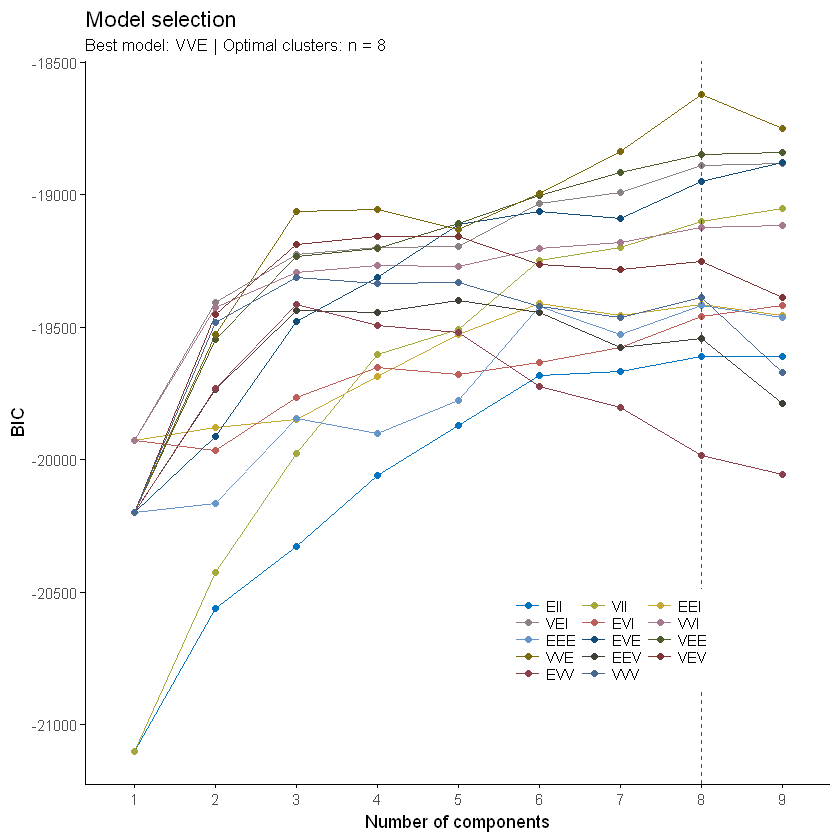

In [164]:
# BIC values used for choosing the number of clusters
fviz_mclust(fit, "BIC", palette = "jco")

Above we plot BIC scores vs number of clusters to compare how the various models perform. VVE comesup as the winner with the highest BIC score at 8 clusters.

By displaying the scatter plots clusters for the two critical dimensions, we note that 8 clusters though recommended as the best performing model based on BIC maybe overfitting our data.By setting the optional tuning parameter lambda = 1, instead of the default value 0.5, only the information on cluster means is used for estimating the directions. 

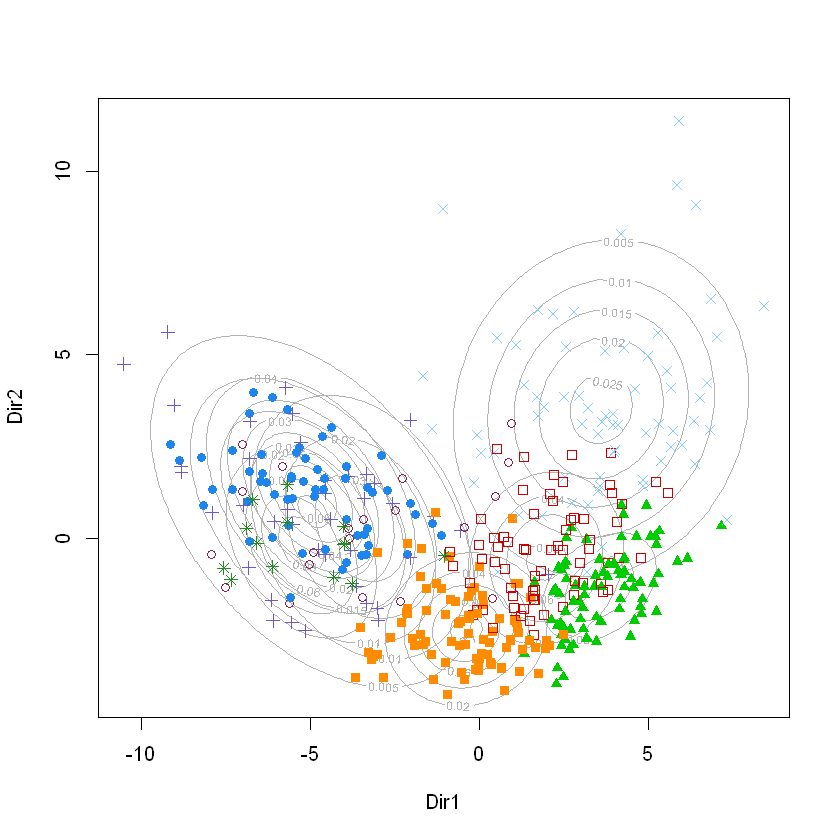

In [165]:
drmod <- MclustDR(fit, lambda = 1)
plot(drmod, what = "contour")

We can verify potential overfitting by looking at the uncertainty plots by adding uncertainty boundaries and then add a circle around the misclassified observations as shown below. It can be noted, a lot of the observations have been misclassified with the selected model. Model based approach offers potential.

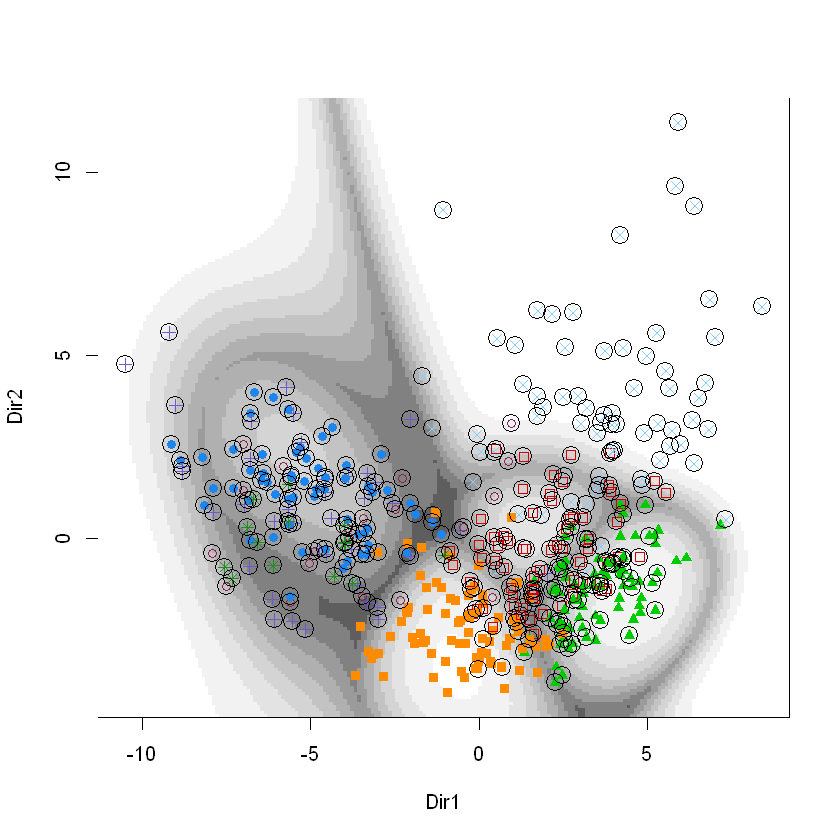

In [166]:
plot(drmod, what = "boundaries", ngrid = 200)
miscl <- classError(data.class, fit$classification)$misclassified
points(drmod$dir[miscl,], pch = 1, cex = 2)